# Cum rezolvăm o problemă de căutare?

1. Observăm care sunt datele de intrare și le introducem în totalitate într-un fișier.
2. Decidem cum abstractizăm problema la un graf (cine vor fi nodurile și muchiile). De obicei nodurile conțin o reprezentare a starii problemei (o configurație) iar muchiile reprezintă tranziții de la o stare la alta (de exemplu, mutarea unei entități în cadrul configurației).
3. Decidem cum memorăm o stare. De exemplu: dacă avem o colecție de date putem folosi o listă sau un tuplu. Dacă datele sunt ca un fel de proprietăți ale configurătiei, putem folosi un dicționar sau o instanță a unei clase definite pentru a ilustra o configurație.
4. Folosim șabloanele date la laborator pentru algoritmi și integrăm codul nostru în ele
5. Parsăm fișierul de input si memoram starea inițială, și, eventual, stările finale.
6. Ne gândim dacă există moduri de a determina dacă problema nu are soluții încă din starea inițială. De exemplu în starea finală apare un item care nu era în cea inițială și nici nu are cum să apară printr-o mutare. Sau nu sunt suficiente locuri valide pentru a realiza mutările necesare. etc.
7. Scriem codul pentru generarea succesorilor unei stări, gândindu-ne la toate mutările posibile pe acea stare inițială și făcând o listă cu rezultatele acestor mutări. Atenție: pentru fiecare mutare ilustrată repornim de la starea pentru care generăm succesorii, deci ar fi bine sa facem câte o copie înainte de mutare, ca să nu stricăm informațiile inițiale și să avem date greșite când generăm a doua mutare
8. Scriem o funcție care testează dacă o configurație e nod scop, conform cerințelor
9. Căutăm idei de euristici. Pentru a găsi euristici, luăm câteva exemple de stări nefinale și câteva exemple de stări finale și le observăm. Ne punem întrebarile:
- Ce elemente se schimbă pentru a ajunge într-o stare finală ?
- Câte elemente se schimbă? (în special când avem colecții de elemente: vectori sau matrici)
- Schimbarea unui element influențează schimbarea altor elemente? Dacă da, atunci trebuie să împărțim euristica la câte elemente se schimbă, deoarece dacă o mutare schimbă de exemplu 2 elemente dar o numărăm pentru fiecare element, ne iese o estimare mai mare decât costul real (neadmisibilă)
- În câți pași se schimbă un element șî de ce factori depinde? Pentru această întrebare putem încerca simplificări ale contextului, dar de care știm sigur că nu măresc numărul de pași ci doar eventual îl micșorează. De exemplu dacă vrem să vedem în câte mutări e parcursă o hartă reprezentată printr-o matrice, în care sunt și obstacole (celule în care nu putem intra). O simplificare bună e ignorarea obstacolelor (un obstacol înseamnă un ocol, deci mai mulți pași, astfel, ignorarea lor, nu poate decât să scadă numărul de pași estimat).
10. Scriem o funcție de afișare care pornește de la informația unui nod și scrie în mod ușor de înțeles această informație. Apelăm funcția pentru fiecare nod dintr-un drum-soluție.
11. Aplicăm eventuale diverse analize cerute în enunț abia după ce am verificat că programul merge. De exemplu, rularea cu timeout sau afișarea timpului de rulare, adăugarea unor contoare pentru numărul de noduri generate (nu trebuie să faceți aceste lucruri decât dacă e specificat clar în enunțul problemei voastre).


## Problema blocurilor

Se considera niste cuburi. Fiecare cub are un identificator, de exemplu o litera.
Cuburile sunt asezate in N stive. Putem avea si stive vide (fara cuburi)
Se da o configuratie initiala a cuburilor asezate in stive si de asemenea o configuratie finala.
Se cere secventa de mutari necesara (configuratiile intermediare) pentru a ajunge de la starea initiala la starea finala. In cadrul unei mutari, nu putem lua decat cuburi aflate in varfurile stivelor, si putem pune un cub doar in varful unei alte stive.

Exemplu de stare initiala:

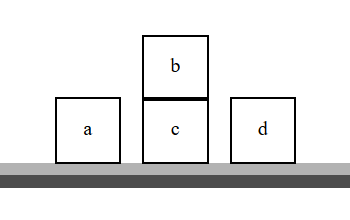


Exemplu de stare finala:

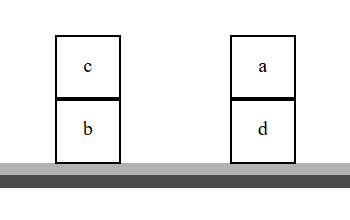

Secventa de mutari:http://www.irinaciocan.ro/inteligenta_artificiala/video/pb_blocuri_mutari.mp4

In [ ]:
"""
Dati enter dupa fiecare solutie afisata.

Presupunem ca avem costul de mutare al unui bloc egal cu indicele in alfabet, 
cu indicii incepând de la 1 (care se calculează prin 1+ diferenta dintre valoarea 
codului ascii al literei blocului de mutat si codul ascii al literei "a" ) . 
Astfel A* are trebui sa prefere drumurile in care se muta intai blocurile cu infomatie 
mai mica lexicografic pentru a ajunge la una dintre starile scop
"""

import copy

#informatii despre un nod din arborele de parcurgere (nu din graful initial)
class NodParcurgere:
    def __init__(self, info, parinte, cost=0, h=0):
        self.info=info
        self.parinte=parinte #parintele din arborele de parcurgere
        self.g=cost 
        self.h=h
        self.f=self.g+self.h

    def obtineDrum(self):
        l=[self];
        nod=self
        while nod.parinte is not None:
            l.insert(0, nod.parinte)
            nod=nod.parinte
        return l
        
    def afisDrum(self, afisCost=False, afisLung=False): #returneaza si lungimea drumului
        l=self.obtineDrum()
        for nod in l:
            print(str(nod))
        if afisCost:
            print("Cost: ", self.g)
        if afisLung:
            print("Lungime: ", len(l))
        return len(l)


    def contineInDrum(self, infoNodNou):
        nodDrum=self
        while nodDrum is not None:
            if(infoNodNou==nodDrum.info):
                return True
            nodDrum=nodDrum.parinte
        
        return False
        
    def __repr__(self):
        sir=""      
        sir+=str(self.info)
        return(sir)

    
    def __str__(self):
        """Afiseaza stivele aranjate vertical"""
        sir=""
        maxInalt=max([len(stiva) for stiva in self.info])
        for inalt in range(maxInalt, 0, -1):
            for stiva in self.info:
                if len(stiva)< inalt:
                    sir+="  "
                else:
                    sir+=stiva[inalt-1]+" "
            sir+="\n"
        sir+="-"*(2*len(self.info)-1)
        return sir
    
    """
    def __str__(self):
        sir=""
        for stiva in self.info:
            sir+=(str(stiva))+"\n"
        sir+="--------------\n"
        return sir
    """
        


In [ ]:

class Graph: #graful problemei
    def __init__(self, nume_fisier):

        def obtineStive(sir):
            stiveSiruri=sir.strip().split("\n") #["a","c b","d"]
            listaStive=[sirStiva.strip().split() if sirStiva !="#" else [] for sirStiva in stiveSiruri]
            # in C++:  x = cond ? val_true : val_false
            # in Python: x = val_true if cond else val_false
            
            return listaStive


        f = open(nume_fisier, 'r') 

        continutFisier=f.read() #citesc tot continutul fisierului
        siruriStari=continutFisier.strip().split("stari_finale")
        self.start=obtineStive(siruriStari[0]) #[["a"], ["c","b"],["d"]]
        self.scopuri=[]
        siruriStariFinale=siruriStari[1].strip().split("---")
        for scop in siruriStariFinale:
            self.scopuri.append(obtineStive(scop))
        print("Stare Initiala:", self.start)
        print("Stari finale posibile:",self.scopuri)
        input()

    def testeaza_scop(self, nodCurent):
        return nodCurent.info in self.scopuri

    #va genera succesorii sub forma de noduri in arborele de parcurgere 

    def genereazaSuccesori(self, nodCurent, tip_euristica="euristica banala"):
        listaSuccesori=[]
        stive_c=nodCurent.info # stivele din nodul curent
        nr_stive=len(stive_c)
        for idx in range(nr_stive):#idx= indicele stivei de pe care iau bloc
            
            if len(stive_c[idx])==0 :
                continue
            copie_interm=copy.deepcopy(stive_c)
            bloc=copie_interm[idx].pop() #iau varful stivei
            for j in range(nr_stive): #j = indicele stivei pe care pun blocul 
                if idx == j: # nu punem blocul de unde l-am luat
                    continue
                stive_n=copy.deepcopy(copie_interm)#lista noua de stive
                stive_n[j].append(bloc) # pun blocul
                costMutareBloc=1+ord(bloc)-ord("a")   # indexul pt bloc          
                if not nodCurent.contineInDrum(stive_n):
                    nod_nou=NodParcurgere(stive_n,nodCurent, cost=nodCurent.g+costMutareBloc,
                                          h= self.calculeaza_h(stive_n, tip_euristica))
                    listaSuccesori.append(nod_nou)

        return listaSuccesori


    def calculeaza_h(self, infoNod, tip_euristica="euristica banala"):
        #euristica banală: daca nu e stare scop, returnez 1, altfel 0
        if tip_euristica=="euristica banala":
            if infoNod not in self.scopuri:
                return 1 #se pune costul minim pe o mutare
            return 0            
        elif tip_euristica=="euristica admisibila 1":
            #calculez cate blocuri nu sunt la locul fata de fiecare dintre starile scop, 
            #si apoi iau minimul dintre aceste valori
            euristici=[]
            for (iScop,scop) in enumerate(self.scopuri):
                h=0
                for iStiva, stiva in enumerate(infoNod):
                        for iElem, elem in enumerate(stiva):
                            try:
                                #exista în stiva scop indicele iElem dar pe acea pozitie nu se afla blocul din infoNod
                                if elem!=scop[iStiva][iElem]:
                                    h+=1 #adun cu costul minim pe o mutare (adica costul lui a)
                            except IndexError:
                                #nici macar nu exista pozitia iElem in stiva cu indicele iStiva din scop
                                h+=1
                euristici.append(h)
            return min(euristici)       
        elif tip_euristica=="euristica admisibila 2":
            #calculez cate blocuri nu sunt la locul fata de fiecare dintre starile scop, 
            #si apoi iau minimul dintre aceste valori
            euristici=[]
            for (iScop,scop) in enumerate(self.scopuri):
                h=0
                for iStiva, stiva in enumerate(infoNod):
                        for iElem, elem in enumerate(stiva):
                            try:
                                #exista în stiva scop indicele iElem dar pe acea pozitie nu se afla blocul din infoNod
                                if elem!=scop[iStiva][iElem]:
                                    h+=1
                                else: # elem==scop[iStiva][iElem]:
                                    if stiva[:iElem]!=scop[iStiva][:iElem]:
                                     h+=2
                            except IndexError:
                                #nici macar nu exista pozitia iElem in stiva cu indicele iStiva din scop
                                h+=1
                euristici.append(h)
            return min(euristici)
        else: #tip_euristica=="euristica neadmisibila"
            euristici=[]
            # Supraestimez costurile
            for (iScop,scop) in enumerate(self.scopuri):
                h=0
                for iStiva, stiva in enumerate(infoNod):
                        for iElem, elem in enumerate(stiva):
                            try:
                                #exista în stiva scop indicele iElem dar pe acea pozitie nu se afla blocul din infoNod
                                if elem!=scop[iStiva][iElem]:
                                    h+=3
                                else: # elem==scop[iStiva][iElem]:
                                    if stiva[:iElem]!=scop[iStiva][:iElem]:
                                        h+=2
                            except IndexError:
                                #nici macar nu exista pozitia iElem in stiva cu indicele iStiva din scop
                                h+=3
                euristici.append(h)
            return max(euristici)



    def __repr__(self):
        sir=""
        for (k,v) in self.__dict__.items() :
            sir+="{} = {}\n".format(k,v)
        return(sir)
        
        


In [ ]:
def breadth_first(gr, nrSolutiiCautate):

    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None)]
    
    while len(c)>0:
        #print("Coada actuala: " + str(c))
        #input()
        nodCurent=c.pop(0)

        if gr.testeaza_scop(nodCurent):
            print("Solutie:")
            nodCurent.afisDrum(afisCost=True, afisLung=True)
            print("\n----------------\n")
            input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        c.extend(lSuccesori)



In [ ]:
def a_star(gr, nrSolutiiCautate, tip_euristica):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    while len(c)>0:
        nodCurent=c.pop(0)
        
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ")
            nodCurent.afisDrum(afisCost=True, afisLung=True)
            print("\n----------------\n")
            input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent,tip_euristica=tip_euristica) 
        for s in lSuccesori:
            i=0
            gasit_loc=False
            for i in range(len(c)):
                #diferenta fata de UCS e ca ordonez dupa f
                if c[i].f>=s.f :
                    gasit_loc=True
                    break;
            if gasit_loc:
                c.insert(i,s)
            else:
                c.append(s)



In [ ]:
# input.txt:
input_blocuri = """
a
c b
d
stari_finale
b c
#
d a
---
a b c d
#
#
---
#
#
d b c a
---
c b d a
#
#
"""

# Cream programatic fisierul "input.txt" ca sa fie mai usor pentru orice mediu de lucru/dezvoltare (inclusiv din Colab). 
# In mod normal puteti crea manual fisierul de input (si eventual incarca in session storage ca sa il puteti folosi din Colab).
with open("input_blocuri.txt", "w+") as fbl:
  fbl.write(input_blocuri)


In [ ]:
gr=Graph("input_blocuri.txt")               

#Rezolvat cu breadth first
"""
print("Solutii obtinute cu breadth first:")
breadth_first(gr, nrSolutiiCautate=3)
"""

print("\n\n##################\nSolutii obtinute cu A*:")
# print("\nObservatie: stivele sunt afisate pe orizontala, cu baza la stanga si varful la dreapta.")
nrSolutiiCautate=3
a_star(gr, nrSolutiiCautate=3,tip_euristica="euristica admisibila 1")


Stare Initiala: [['a'], ['c', 'b'], ['d']]
Stari finale posibile: [[['b', 'c'], [], ['d', 'a']], [['a', 'b', 'c', 'd'], [], []], [[], [], ['d', 'b', 'c', 'a']], [['c', 'b', 'd', 'a'], [], []]]



##################
Solutii obtinute cu A*:
Solutie: 
  b   
a c d 
-----
    b 
a c d 
-----
    c 
    b 
a   d 
-----
    a 
    c 
    b 
    d 
-----
Cost:  6
Lungime:  4

----------------


Solutie: 
  b   
a c d 
-----
  b a 
  c d 
-----
    a 
b c d 
-----
c   a 
b   d 
-----
Cost:  6
Lungime:  4

----------------


Solutie: 
  b   
a c d 
-----
    b 
a c d 
-----
    c 
    b 
a   d 
-----
    c 
    b 
  a d 
-----
    a 
    c 
    b 
    d 
-----
Cost:  7
Lungime:  5

----------------




In [ ]:
"""
a b c
d e
g


g e c
d a b
|

""" # alt exemplu

# Problema canibalilor si misionarilor

Se considera ca avem un numar (notat cu N) egal de canibali si misionari pe malul unui rau. Ei vor sa treaca raul cu ajutorul unei barci cu M locuri. Daca pe unul din maluri sau in barca numarul de canibali e mai mare (strict) decat numarul de misionari atunci canibalii o sa ii manance pe misionari. Care este secventa de actiuni care trebuie realizata astfel incat misionarii sa nu ajunga pranz pentru canibali?

Problema clasica este cu N=3 (canibali si misionari) si M=2(locuri in barca).

In [ ]:
"""
Dati enter dupa fiecare solutie afisata.

Presupunem ca avem costul de plimbare a unui canibal =2 si a unui misionar =1. 
Astfel A* are trebui sa prefere drumurile in care se muta mai rar canibalii
"""

import math

#informatii despre un nod din arborele de parcurgere (nu din graful initial)
class NodParcurgere:
    gr=None #trebuie setat sa contina instanta problemei
    def __init__(self, info, parinte, cost=0, h=0):
        self.info=info
        self.parinte=parinte #parintele din arborele de parcurgere
        self.g=cost
        self.h=h
        self.f=self.g+self.h


    def obtineDrum(self):
        l=[self];
        nod=self
        while nod.parinte is not None:
            l.insert(0, nod.parinte)
            nod=nod.parinte
        return l
        
    def afisDrum(self, afisCost=False, afisLung=False): #returneaza si lungimea drumului
        l=self.obtineDrum()
        for nod in l:
            if nod.parinte is not None:
                if nod.parinte.info[2]==1:
                    mbarca1=self.__class__.gr.malInitial
                    mbarca2=self.__class__.gr.malFinal
                else:
                    mbarca1=self.__class__.gr.malFinal
                    mbarca2=self.__class__.gr.malInitial
                print(">>> Barca s-a deplasat de la malul {} la malul {} cu {} canibali si {} misionari.".format(
                    mbarca1,mbarca2, abs(nod.info[0]-nod.parinte.info[0]), abs(nod.info[1]-nod.parinte.info[1])))
            print(str(nod))
        if afisCost:
            print("Cost: ", self.g)
        if afisLung:
            print("Nr noduri: ", len(l))
        return len(l)


    def contineInDrum(self, infoNodNou):
        nodDrum=self
        while nodDrum is not None:
            if(infoNodNou==nodDrum.info):
                return True
            nodDrum=nodDrum.parinte
        
        return False
        
    def __repr__(self):
        sir=""      
        sir+=str(self.info)
        return(sir)


    #euristica banală: daca nu e stare scop, returnez 1, altfel 0

    
    def __str__(self):
        if self.info[2]==1:
            barcaMalInitial="<barca>"
            barcaMalFinal="       "
        else:
            barcaMalInitial="       "
            barcaMalFinal="<barca>"
        return ("Mal: "+ self.gr.malInitial +" Canibali: {} Misionari: {} {}  |||  Mal:"+self.gr.malFinal+" Canibali: {} Misionari: {} {}").format(
            self.info[0], self.info[1],
            barcaMalInitial, 
            self.__class__.gr.N-self.info[0], 
            self.__class__.gr.N-self.info[1],  
            barcaMalFinal)
    """
    def __str__(self):
        return str(self.info)+"\n"

    """


In [ ]:

class Graph: #graful problemei
    def __init__(self, nume_fisier):


        f=open(nume_fisier,"r")
        textFisier=f.read() #citeste tot fisierul si returneaza un string cu continutul lui
        listaInfoFisier=textFisier.strip().split()# ["3", "2", "stang", "drept"]
        # self.__class__ inseamna clasa curenta
        self.__class__.N=int(listaInfoFisier[0])
        self.__class__.M=int(listaInfoFisier[1])
        self.__class__.malInitial=listaInfoFisier[2]
        self.__class__.malFinal=listaInfoFisier[3]
        #memoram in stare doar canibalii si misionarii de pe malul stang; pe ceilalti ii deducem
        # (nrCanibaliMalInitial, numarMisionariMalInitial, locatieBarca)
        # locatieBarca= 1 daca e pe malul initial si 0 daca e pe malul final
        self.start=(self.__class__.N,self.__class__.N,1) #informatia nodului de start
        #self.scopuri=[(0,0,0)]

    def testeaza_scop(self, nodCurent):
        return nodCurent.info[0]==nodCurent.info[1]==nodCurent.info[2]==0



    #functia de generare a succesorilor, facuta la laborator
    def genereazaSuccesori(self, nodCurent,tip_euristica="euristica banala"):
        #mal curent = mal cu barca; mal opus=mal fara barca
        def test_conditie(mis, can):
            return mis==0 or mis>=can

        listaSuccesori=[]
        #nodCurent.info va contine un triplet (c_i, m_i, mal_barca)
        barca=nodCurent.info[2]
        if barca==1: #malul barcii este cel initial
            canMalCurent=nodCurent.info[0]
            misMalCurent=nodCurent.info[1]
            canMalOpus=Graph.N-canMalCurent
            misMalOpus=Graph.N-misMalCurent
        else: #barca==0 adica malul final
            canMalOpus=nodCurent.info[0] #malul opus (barcii) este cel initial
            misMalOpus=nodCurent.info[1]
            canMalCurent=Graph.N-canMalOpus         
            misMalCurent=Graph.N-misMalOpus         
        maxMisionariBarca=min(Graph.M, misMalCurent)
        for misBarca in range(maxMisionariBarca+1):
            if misBarca==0:
                maxCanibaliBarca=min(Graph.M, canMalCurent)
                minCanibaliBarca=1
            else:
                maxCanibaliBarca=min(Graph.M-misBarca, canMalCurent, misBarca)
                minCanibaliBarca=0
            for canBarca in range(minCanibaliBarca, maxCanibaliBarca+1):
                #consideram mal curent nou ca fiind acelasi mal de pe care a plecat barca
                canMalCurentNou=canMalCurent-canBarca
                misMalCurentNou=misMalCurent-misBarca
                canMalOpusNou=canMalOpus+canBarca
                misMalOpusNou=misMalOpus+misBarca
                if not test_conditie(misMalCurentNou,canMalCurentNou ):
                    continue
                if not test_conditie(misMalOpusNou,canMalOpusNou ):
                    continue    
                if barca==1: #testul este pentru barca nodului curent (parinte) deci inainte de mutare
                    infoNodNou= (canMalCurentNou,misMalCurentNou, 0)    
                else:               
                    infoNodNou= (canMalOpusNou,misMalOpusNou, 1)
                if not nodCurent.contineInDrum(infoNodNou):
                    costSuccesor=1
                    #costSuccesor=canBarca*2+misBarca
                    listaSuccesori.append(NodParcurgere(infoNodNou, nodCurent, cost=nodCurent.g+costSuccesor, h=NodParcurgere.gr.calculeaza_h(infoNodNou, tip_euristica)))

        return listaSuccesori


    #va genera succesorii sub forma de noduri in arborele de parcurgere 
    #aceasta este o functie mai eficienta de generare a succesorilor, 
    #care genereaza direct perechiile valide de numere de canibali si misionari care trec raul 
    #(respectand conditia problemei atat pe maluri cat si in barca; 
    #deci nu se mai genereaza acele perechi pe care le eliminam apoi pentru ca nu indeplineau conditia)
    """
    def genereazaSuccesori(self, nodCurent, tip_euristica="euristica banala"):

        #functie ajutatoare pentru a nu duplica codul
        def adaugaUnSuccesor(graf,nodCurent,listaSuccesori,canBarca,misBarca,bOpus, tip_euristica):
            infoNodNou=(nodCurent.info[0]+operatie*canBarca, nodCurent.info[1]+operatie*misBarca,bOpus)                 
            if not nodCurent.contineInDrum(infoNodNou):                     
                costSuccesor=canBarca*2+misBarca # presupunem ca mutarea unui canibal costa de 2 ori mai mult
                listaSuccesori.append(NodParcurgere( infoNodNou , parinte=nodCurent, cost=nodCurent.g+costSuccesor, h=graf.calculeaza_h(infoNodNou, tip_euristica)))

        listaSuccesori=[]
        if nodCurent.info[2]==1:
            canMalCurent=nodCurent.info[0]
            misMalCurent=nodCurent.info[1]
            operatie=-1
        else:
            operatie=1
            canMalCurent=self.N-nodCurent.info[0]
            misMalCurent=self.N-nodCurent.info[1]

        bOpus=1-nodCurent.info[2]

    
        #Voi incerca sa generez numerele de misionari si canibali care pleaca cu barca, cat mai eficient, astfel incat sa nu generez perechi care nu ar verifica conditia din enunt.

        #Observatie: daca am si misionari si canibali  pe un mal, atunci, pe acel mal:
        #- ori sunt toti misionarii si canibali pot fi oricati
        #- ori numarul de misionari e egal cu numarul de canibali

        #daca am avea si misionari si canibali (deci numarul lor diferit de 0) pe ambele maluri si nu ar fi in numar egal, presupunem ca M1 si C1 sunt pe malul 1 
        conditia cere M1>=C1 si cum am zis ca testam ce se intampla cand nu sunt in numar egal, presupunem M1>C1 (strict)
        atunci avem pe celalalt mal N-M1 si N-C1 dar pentru care e adevarat ca N-M1<N-C1 deci nu indeplineste conditia
    

        #generez intai toti succesorii pentru canibali cand numarul de misionari este 0
    
        #canibalii pot pleca singuri doar daca toti misionarii sunt pe un singur mal, altfel daca avem M1 misionari pe primul mal, respectiv M2 misionari pe al doilea mal, ca sa avem echilibru, obligatoriu avem tot M1 si M2 canibali, iar la mutarea unui grup de canibali pe un mal nu se va mai indeplini conditia
        if misMalCurent==0:
            #pleaca 0 misionari si oricati canibali
            for can in range(1, min(self.M, canMalCurent)+1):
                    adaugaUnSuccesor(self,nodCurent,listaSuccesori,can,0,bOpus, tip_euristica)


        
        else:
            #singurul caz in care pot pleca doar canibali daca exista si misionari pe malul curent este cand toti misionarii sunt pe malul curent
            if misMalCurent==self.N:                
                for can in range(1, min(self.M, canMalCurent)+1):
                    adaugaUnSuccesor(self,nodCurent,listaSuccesori,can,0,bOpus,tip_euristica)

            #pot pleca toti misionarii gramada + canibali cat mai incap in barca
            if misMalCurent<=self.M:
                for can in range(0, self.M-misMalCurent+1):
                    adaugaUnSuccesor(self,nodCurent,listaSuccesori,can,misMalCurent,bOpus,tip_euristica)

            #daca nu pleaca toti misionarii, sunt restrictionati de cati canibali sunt pe malul curent si opus
            # de exemplu, pe malul curent : can:C1 mis:N   opus: can:N-C1 mis:0 atunci pot pleca doar de la N-C1 misionari incolo. Daca pleaca N-C1+K misionari, trebuie sa trimit obligatoriu si K canibali.
            #daca misionarii sunt in numar nenul, mai mic decat N pe malul curent, malurile sigur arata asa: can:X mis:X can:N-X mis: N-X si atunci pleaca in numar egal; N-C1 de mai sus ar fi X-X= 0 in cazul asta, 
            minimMisionari=min(misMalCurent-canMalCurent,misMalCurent)#nu pot pleca mai multi misionari decat am pe malul curent, dar nici mai multi decat diferenta dintre numarul de misionari si canibali pe malul curent (care reprezinta surplusul de canibali de pe malul opus). De exemplu 3m 1c | 0m 2c din stanga nu pot pleca mai putin de  2 misionari fiindca malul din dreapta nu ar mai respecta conditia
            minK=1 if minimMisionari==0 else 0#trebuie sa plece macar un misionar ca sa nu pic pe cazul de mai sus cand pleaca doar canibali
            for k in range(minK, min(canMalCurent, (self.M-minimMisionari)//2, misMalCurent-minimMisionari-1)+1):       
                #print("minK", minK, "minimMisionari", minimMisionari, "can ", k, "mis ",minimMisionari+k) #pentru debug
                adaugaUnSuccesor(self,nodCurent,listaSuccesori,k,minimMisionari+k,bOpus, tip_euristica)

            
            
        return listaSuccesori
    """

    

    # euristica banala
    def calculeaza_h(self, infoNod, tip_euristica="euristica banala"):
        if tip_euristica=="euristica banala":
            if not infoNod[0]==infoNod[1]==infoNod[2]==0:
                return 1
            return 0            
        else:
            #calculez cati oameni mai am de mutat si impart la nr de locuri in barca
            #totalOameniDeMutat=infoNod[0]+infoNod[1]
            return 2*math.ceil((infoNod[0]+infoNod[1])/(self.M-1))+(1-infoNod[2])-1 
            #(1-infoNod[2]) vine de la faptul ca daca barca e pe malul final trebuie sa mai faca o trecere 
            # spre malul initial ca sa ii ia pe oameni, pe cand daca e deja pe malul initial, nu se mai aduna acel 1

        """
        5c 5m  barca:3locuri


        ----->b:3
        <---- b:1

         2  --->b:3
        """


        """
        21+21=42  3   42/3=14 drumuri dus, dar si intors
        <--- 14
        """



    def __repr__(self):
        sir=""
        for (k,v) in self.__dict__.items() :
            sir+="{} = {}\n".format(k,v)
        return(sir)
        
        

In [ ]:
# input

input_misionari = """
3 2 stang drept"""

# Cream programatic fisierul "input.txt" ca sa fie mai usor pentru orice mediu de lucru/dezvoltare (inclusiv din Colab). 
# In mod normal puteti crea manual fisierul de input (si eventual incarca in session storage ca sa il puteti folosi din Colab).
with open("input_misionari.txt", "w+") as fbl:
  fbl.write(input_misionari)

In [ ]:

gr=Graph("input_misionari.txt")               
NodParcurgere.gr=gr
#Rezolvat cu breadth first
#print("Solutii obtinute cu breadth first:")
#breadth_first(gr, nrSolutiiCautate=3)

print("\n\n##################\nSolutii obtinute cu A*:")
nrSolutiiCautate=3
a_star(gr, nrSolutiiCautate=3,tip_euristica="euristica nebanala")



##################
Solutii obtinute cu A*:
Solutie: 
Mal: stang Canibali: 3 Misionari: 3 <barca>  |||  Mal:drept Canibali: 0 Misionari: 0        
>>> Barca s-a deplasat de la malul stang la malul drept cu 1 canibali si 1 misionari.
Mal: stang Canibali: 2 Misionari: 2          |||  Mal:drept Canibali: 1 Misionari: 1 <barca>
>>> Barca s-a deplasat de la malul drept la malul stang cu 0 canibali si 1 misionari.
Mal: stang Canibali: 2 Misionari: 3 <barca>  |||  Mal:drept Canibali: 1 Misionari: 0        
>>> Barca s-a deplasat de la malul stang la malul drept cu 2 canibali si 0 misionari.
Mal: stang Canibali: 0 Misionari: 3          |||  Mal:drept Canibali: 3 Misionari: 0 <barca>
>>> Barca s-a deplasat de la malul drept la malul stang cu 1 canibali si 0 misionari.
Mal: stang Canibali: 1 Misionari: 3 <barca>  |||  Mal:drept Canibali: 2 Misionari: 0        
>>> Barca s-a deplasat de la malul stang la malul drept cu 0 canibali si 2 misionari.
Mal: stang Canibali: 1 Misionari: 1          |||  

# Exercitii (2p)

1. Modificati euristicile admisibile 1 si 2 pentru problema blocurilor, astfel incat sa ia in considerare si costul blocului de mutat (cel care nu e la locul lui) - adica penru un bloc care nu e bine plasat sa se adune costului lui efectiv la h, nu costul minim 1.



In [ ]:
"""
Dati enter dupa fiecare solutie afisata.

Presupunem ca avem costul de mutare al unui bloc egal cu indicele in alfabet, 
cu indicii incepând de la 1 (care se calculează prin 1+ diferenta dintre valoarea 
codului ascii al literei blocului de mutat si codul ascii al literei "a" ) . 
Astfel A* are trebui sa prefere drumurile in care se muta intai blocurile cu infomatie 
mai mica lexicografic pentru a ajunge la una dintre starile scop
"""

import copy

#informatii despre un nod din arborele de parcurgere (nu din graful initial)
class NodParcurgere:
    def __init__(self, info, parinte, cost=0, h=0):
        self.info=info
        self.parinte=parinte #parintele din arborele de parcurgere
        self.g=cost 
        self.h=h
        self.f=self.g+self.h

    def obtineDrum(self):
        l=[self];
        nod=self
        while nod.parinte is not None:
            l.insert(0, nod.parinte)
            nod=nod.parinte
        return l
        
    def afisDrum(self, afisCost=False, afisLung=False): #returneaza si lungimea drumului
        l=self.obtineDrum()
        for nod in l:
            print(str(nod))
        if afisCost:
            print("Cost: ", self.g)
        if afisLung:
            print("Lungime: ", len(l))
        return len(l)


    def contineInDrum(self, infoNodNou):
        nodDrum=self
        while nodDrum is not None:
            if(infoNodNou==nodDrum.info):
                return True
            nodDrum=nodDrum.parinte
        
        return False
        
    def __repr__(self):
        sir=""      
        sir+=str(self.info)
        return(sir)

    
    def __str__(self):
        """Afiseaza stivele aranjate vertical"""
        sir=""
        maxInalt=max([len(stiva) for stiva in self.info])
        for inalt in range(maxInalt, 0, -1):
            for stiva in self.info:
                if len(stiva)< inalt:
                    sir+="  "
                else:
                    sir+=stiva[inalt-1]+" "
            sir+="\n"
        sir+="-"*(2*len(self.info)-1)
        return sir
    
    """
    def __str__(self):
        sir=""
        for stiva in self.info:
            sir+=(str(stiva))+"\n"
        sir+="--------------\n"
        return sir
    """
        

class Graph: #graful problemei
    def __init__(self, nume_fisier):

        def obtineStive(sir):
            stiveSiruri=sir.strip().split("\n") #["a","c b","d"]
            listaStive=[sirStiva.strip().split() if sirStiva !="#" else [] for sirStiva in stiveSiruri]
            # in C++:  x = cond ? val_true : val_false
            # in Python: x = val_true if cond else val_false
            
            return listaStive


        f = open(nume_fisier, 'r') 

        continutFisier=f.read() #citesc tot continutul fisierului
        siruriStari=continutFisier.strip().split("stari_finale")
        self.start=obtineStive(siruriStari[0]) #[["a"], ["c","b"],["d"]]
        self.scopuri=[]
        siruriStariFinale=siruriStari[1].strip().split("---")
        for scop in siruriStariFinale:
            self.scopuri.append(obtineStive(scop))
        print("Stare Initiala:", self.start)
        print("Stari finale posibile:",self.scopuri)
        input()

    def testeaza_scop(self, nodCurent):
        return nodCurent.info in self.scopuri

    #va genera succesorii sub forma de noduri in arborele de parcurgere 

    def genereazaSuccesori(self, nodCurent, tip_euristica="euristica banala"):
        listaSuccesori=[]
        stive_c=nodCurent.info # stivele din nodul curent
        nr_stive=len(stive_c)
        for idx in range(nr_stive):#idx= indicele stivei de pe care iau bloc
            
            if len(stive_c[idx])==0 :
                continue
            copie_interm=copy.deepcopy(stive_c)
            bloc=copie_interm[idx].pop() #iau varful stivei
            for j in range(nr_stive): #j = indicele stivei pe care pun blocul 
                if idx == j: # nu punem blocul de unde l-am luat
                    continue
                stive_n=copy.deepcopy(copie_interm)#lista noua de stive
                stive_n[j].append(bloc) # pun blocul
                costMutareBloc=1+ord(bloc)-ord("a")   # indexul pt bloc          
                if not nodCurent.contineInDrum(stive_n):
                    nod_nou=NodParcurgere(stive_n,nodCurent, cost=nodCurent.g+costMutareBloc,
                                          h= self.calculeaza_h(stive_n, tip_euristica))
                    listaSuccesori.append(nod_nou)

        return listaSuccesori


    def calculeaza_h(self, infoNod, tip_euristica="euristica banala"):
        #euristica banală: daca nu e stare scop, returnez 1, altfel 0
        if tip_euristica=="euristica banala":
            if infoNod not in self.scopuri:
                return 1 #se pune costul minim pe o mutare
            return 0            
        elif tip_euristica=="euristica admisibila 1":
            #calculez cate blocuri nu sunt la locul fata de fiecare dintre starile scop, 
            #si apoi iau minimul dintre aceste valori
            euristici=[]
            for (iScop,scop) in enumerate(self.scopuri):
                h=0
                for iStiva, stiva in enumerate(infoNod):
                        for iElem, elem in enumerate(stiva):
                            try:
                                #exista în stiva scop indicele iElem dar pe acea pozitie nu se afla blocul din infoNod
                                if elem!=scop[iStiva][iElem]:
                                    h+= 1 + ord(elem)-ord("a") #adun cu costul minim pe o mutare (adica costul lui a)
                            except IndexError:
                                #nici macar nu exista pozitia iElem in stiva cu indicele iStiva din scop
                                h+= 1 + ord(elem)-ord("a")
                euristici.append(h)
            return min(euristici)       
        elif tip_euristica=="euristica admisibila 2":
            #calculez cate blocuri nu sunt la locul fata de fiecare dintre starile scop, 
            #si apoi iau minimul dintre aceste valori
            euristici=[]
            for (iScop,scop) in enumerate(self.scopuri):
                h=0
                for iStiva, stiva in enumerate(infoNod):
                        for iElem, elem in enumerate(stiva):
                            try:
                                #exista în stiva scop indicele iElem dar pe acea pozitie nu se afla blocul din infoNod
                                if elem!=scop[iStiva][iElem]:
                                    h+=1 + ord(elem)-ord("a")
                                else: # elem==scop[iStiva][iElem]:
                                    if stiva[:iElem]!=scop[iStiva][:iElem]:
                                     h+= 2 * (1 + ord(elem)-ord("a")) # 2 *cost mutare bloc
                            except IndexError:
                                #nici macar nu exista pozitia iElem in stiva cu indicele iStiva din scop
                                h+=1 + ord(elem)-ord("a")
                euristici.append(h)
            return min(euristici)
        else: #tip_euristica=="euristica neadmisibila"
            euristici=[]
            # Supraestimez costurile
            for (iScop,scop) in enumerate(self.scopuri):
                h=0
                for iStiva, stiva in enumerate(infoNod):
                        for iElem, elem in enumerate(stiva):
                            try:
                                #exista în stiva scop indicele iElem dar pe acea pozitie nu se afla blocul din infoNod
                                if elem!=scop[iStiva][iElem]:
                                    h+=3
                                else: # elem==scop[iStiva][iElem]:
                                    if stiva[:iElem]!=scop[iStiva][:iElem]:
                                        h+=2
                            except IndexError:
                                #nici macar nu exista pozitia iElem in stiva cu indicele iStiva din scop
                                h+=3
                euristici.append(h)
            return max(euristici)



    def __repr__(self):
        sir=""
        for (k,v) in self.__dict__.items() :
            sir+="{} = {}\n".format(k,v)
        return(sir)
        
        
def breadth_first(gr, nrSolutiiCautate):

    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None)]
    
    while len(c)>0:
        #print("Coada actuala: " + str(c))
        #input()
        nodCurent=c.pop(0)

        if gr.testeaza_scop(nodCurent):
            print("Solutie:")
            nodCurent.afisDrum(afisCost=True, afisLung=True)
            print("\n----------------\n")
            input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        c.extend(lSuccesori)

def a_star(gr, nrSolutiiCautate, tip_euristica):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    while len(c)>0:
        nodCurent=c.pop(0)
        
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ")
            nodCurent.afisDrum(afisCost=True, afisLung=True)
            print("\n----------------\n")
            input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent,tip_euristica=tip_euristica) 
        for s in lSuccesori:
            i=0
            gasit_loc=False
            for i in range(len(c)):
                #diferenta fata de UCS e ca ordonez dupa f
                if c[i].f>=s.f :
                    gasit_loc=True
                    break;
            if gasit_loc:
                c.insert(i,s)
            else:
                c.append(s)



In [ ]:
# input.txt:
input_blocuri = """
a
c b
d
stari_finale
b c
#
d a
---
a b c d
#
#
---
#
#
d b c a
---
c b d a
#
#
"""

# Cream programatic fisierul "input.txt" ca sa fie mai usor pentru orice mediu de lucru/dezvoltare (inclusiv din Colab). 
# In mod normal puteti crea manual fisierul de input (si eventual incarca in session storage ca sa il puteti folosi din Colab).
with open("input_blocuri.txt", "w+") as fbl:
  fbl.write(input_blocuri)

gr=Graph("input_blocuri.txt")               

#Rezolvat cu breadth first
"""
print("Solutii obtinute cu breadth first:")
breadth_first(gr, nrSolutiiCautate=3)
"""

print("\n\n##################\nSolutii obtinute cu A*:")
# print("\nObservatie: stivele sunt afisate pe orizontala, cu baza la stanga si varful la dreapta.")
nrSolutiiCautate=3
a_star(gr, nrSolutiiCautate=3,tip_euristica="euristica admisibila 1")


Stare Initiala: [['a'], ['c', 'b'], ['d']]
Stari finale posibile: [[['b', 'c'], [], ['d', 'a']], [['a', 'b', 'c', 'd'], [], []], [[], [], ['d', 'b', 'c', 'a']], [['c', 'b', 'd', 'a'], [], []]]



##################
Solutii obtinute cu A*:
Solutie: 
  b   
a c d 
-----
    b 
a c d 
-----
    c 
    b 
a   d 
-----
    a 
    c 
    b 
    d 
-----
Cost:  6
Lungime:  4

----------------


Solutie: 
  b   
a c d 
-----
  b a 
  c d 
-----
    a 
b c d 
-----
c   a 
b   d 
-----
Cost:  6
Lungime:  4

----------------


Solutie: 
  b   
a c d 
-----
    b 
a c d 
-----
    c 
    b 
a   d 
-----
    c 
    b 
  a d 
-----
    a 
    c 
    b 
    d 
-----
Cost:  7
Lungime:  5

----------------




2. Să se modifice problema blocurilor astfel încât să consideram ca o stare este scop dacă toate stivele din ea sunt de înălțimi egale (indiferent ce avem pe stive). Se va implemeta și o funcție care verifică dacă din starea inițială e posibil să ajungem la o stare finală. Modificați și euristica în mod corespunzător pentru noul criteriu de stare finală.

In [ ]:
"""
Dati enter dupa fiecare solutie afisata.

Presupunem ca avem costul de mutare al unui bloc egal cu indicele in alfabet, 
cu indicii incepând de la 1 (care se calculează prin 1+ diferenta dintre valoarea 
codului ascii al literei blocului de mutat si codul ascii al literei "a" ) . 
Astfel A* are trebui sa prefere drumurile in care se muta intai blocurile cu infomatie 
mai mica lexicografic pentru a ajunge la una dintre starile scop
"""

import copy

#informatii despre un nod din arborele de parcurgere (nu din graful initial)
class NodParcurgere:
    
    def __init__(self, info, parinte, cost=0, h=0):
        self.info=info
        self.parinte=parinte #parintele din arborele de parcurgere
        self.g=cost 
        self.h=h
        self.f=self.g+self.h

    def obtineDrum(self):
        l=[self];
        nod=self
        while nod.parinte is not None:
            l.insert(0, nod.parinte)
            nod=nod.parinte
        return l
        
    def afisDrum(self, afisCost=False, afisLung=False): #returneaza si lungimea drumului
        l=self.obtineDrum()
        for nod in l:
            print(str(nod))
        if afisCost:
            print("Cost: ", self.g)
        if afisLung:
            print("Lungime: ", len(l))
        return len(l)


    def contineInDrum(self, infoNodNou):
        nodDrum=self
        while nodDrum is not None:
            if(infoNodNou==nodDrum.info):
                return True
            nodDrum=nodDrum.parinte
        
        return False
        
    def __repr__(self):
        sir=""      
        sir+=str(self.info)
        return(sir)

    
    def __str__(self):
        """Afiseaza stivele aranjate vertical"""
        sir=""
        maxInalt=max([len(stiva) for stiva in self.info])
        for inalt in range(maxInalt, 0, -1):
            for stiva in self.info:
                if len(stiva)< inalt:
                    sir+="  "
                else:
                    sir+=stiva[inalt-1]+" "
            sir+="\n"
        sir+="-"*(2*len(self.info)-1)
        return sir
    
    """
    def __str__(self):
        sir=""
        for stiva in self.info:
            sir+=(str(stiva))+"\n"
        sir+="--------------\n"
        return sir
    """
        

class Graph: #graful problemei
    def __init__(self, nume_fisier):

        def obtineStive(sir):
            stiveSiruri=sir.strip().split("\n") #["a","c b","d"]
            listaStive=[sirStiva.strip().split() if sirStiva !="#" else [] for sirStiva in stiveSiruri]
            # in C++:  x = cond ? val_true : val_false
            # in Python: x = val_true if cond else val_false
            
            return listaStive


        f = open(nume_fisier, 'r') 

        continutFisier=f.read() #citesc tot continutul fisierului
        siruriStari=continutFisier.strip().split("stari_finale")
        self.start=obtineStive(siruriStari[0]) #[["a"], ["c","b"],["d"]]
        self.scopuri=[]
        siruriStariFinale=siruriStari[1].strip().split("---")
        for scop in siruriStariFinale:
            self.scopuri.append(obtineStive(scop))
        print("Stare Initiala:", self.start)
        print("Stari finale posibile:",self.scopuri)
        input()

    def testeaza_scop(self, nodCurent): # toate stivele din ea sunt de înălțimi egale (indiferent ce avem pe stive)
        lungimeCurenta = len(nodCurent.info[0])
        for elem in nodCurent.info:
          if len(elem) !=lungimeCurenta:
            return False
        return True

    def verifica_posibilitate(self, nodCurent): # o funcție care verifică dacă din starea inițială e posibil să ajungem la o stare finală
        sum = 0
        for elem in nodCurent.info:
          sum += len(elem)
        if sum % len(nodCurent.info) == 0:
          return True
        return False

    #va genera succesorii sub forma de noduri in arborele de parcurgere 

    def genereazaSuccesori(self, nodCurent, tip_euristica="euristica banala"):
        listaSuccesori=[]
        stive_c=nodCurent.info # stivele din nodul curent
        nr_stive=len(stive_c)
        for idx in range(nr_stive):#idx= indicele stivei de pe care iau bloc
            
            if len(stive_c[idx])==0 :
                continue
            copie_interm=copy.deepcopy(stive_c)
            bloc=copie_interm[idx].pop() #iau varful stivei
            for j in range(nr_stive): #j = indicele stivei pe care pun blocul 
                if idx == j: # nu punem blocul de unde l-am luat
                    continue
                stive_n=copy.deepcopy(copie_interm)#lista noua de stive
                stive_n[j].append(bloc) # pun blocul
                costMutareBloc=1+ord(bloc)-ord("a")   # indexul pt bloc          
                if not nodCurent.contineInDrum(stive_n):
                    nod_nou=NodParcurgere(stive_n,nodCurent, cost=nodCurent.g+costMutareBloc,
                                          h= self.calculeaza_h(stive_n, tip_euristica))
                    listaSuccesori.append(nod_nou)

        return listaSuccesori


    def calculeaza_h(self, infoNod, tip_euristica="euristica banala"):
        #euristica banală: daca nu e stare scop, returnez 1, altfel 0
        if tip_euristica=="euristica banala":
            if infoNod not in self.scopuri:
                return 1 #se pune costul minim pe o mutare
            return 0
        else:
            sum = 0
            for elem in infoNod:
              sum += len(elem)   
            inaltimeStiva = sum // len(infoNod)
            euristica = 0
            for stiva in infoNod:     
              for indiceElem in range(inaltimeStiva, len(stiva)):
                euristica += 1 + ord(stiva[indiceElem]) - ord('a')
            return euristica



    def __repr__(self):
        sir=""
        for (k,v) in self.__dict__.items() :
            sir+="{} = {}\n".format(k,v)
        return(sir)

def breadth_first(gr, nrSolutiiCautate):

    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None)]
    if gr.verifica_posibilitate(c[0]):
      while len(c)>0:
          #print("Coada actuala: " + str(c))
          #input()
          nodCurent=c.pop(0)

          if gr.testeaza_scop(nodCurent):
              print("Solutie:")
              nodCurent.afisDrum(afisCost=True, afisLung=True)
              print("\n----------------\n")
              input()
              nrSolutiiCautate-=1
              if nrSolutiiCautate==0:
                  return
          lSuccesori=gr.genereazaSuccesori(nodCurent) 
          c.extend(lSuccesori)
    else:
      print("Nu exista solutii")

def a_star(gr, nrSolutiiCautate, tip_euristica):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None, 0, gr.calculeaza_h(gr.start))]
    if gr.verifica_posibilitate(c[0]):
      while len(c)>0:
          nodCurent=c.pop(0)
          
          if gr.testeaza_scop(nodCurent):
              print("Solutie: ")
              nodCurent.afisDrum(afisCost=True, afisLung=True)
              print("\n----------------\n")
              input()
              nrSolutiiCautate-=1
              if nrSolutiiCautate==0:
                  return
          lSuccesori=gr.genereazaSuccesori(nodCurent,tip_euristica=tip_euristica) 
          for s in lSuccesori:
              i=0
              gasit_loc=False
              for i in range(len(c)):
                  #diferenta fata de UCS e ca ordonez dupa f
                  if c[i].f>=s.f :
                      gasit_loc=True
                      break;
              if gasit_loc:
                  c.insert(i,s)
              else:
                  c.append(s)   
    else:
      print("Nu exista solutii")
        


In [ ]:
# input.txt:
input_blocuri = """
a
c b
#
d
stari_finale
b c
#
d a
---
a b c 
#
#
---
#
#
d b c 
---
c b d
#
#
"""

# Cream programatic fisierul "input.txt" ca sa fie mai usor pentru orice mediu de lucru/dezvoltare (inclusiv din Colab). 
# In mod normal puteti crea manual fisierul de input (si eventual incarca in session storage ca sa il puteti folosi din Colab).
with open("input_blocuri.txt", "w+") as fbl:
  fbl.write(input_blocuri)

gr=Graph("input_blocuri.txt")               

#Rezolvat cu breadth first
"""
print("Solutii obtinute cu breadth first:")
breadth_first(gr, nrSolutiiCautate=3)
"""

print("\n\n##################\nSolutii obtinute cu A*:")
# print("\nObservatie: stivele sunt afisate pe orizontala, cu baza la stanga si varful la dreapta.")
nrSolutiiCautate=3
a_star(gr, nrSolutiiCautate=3,tip_euristica="euristica admisibila 1")


Stare Initiala: [['a'], ['c', 'b'], [], ['d']]
Stari finale posibile: [[['b', 'c'], [], ['d', 'a']], [['a', 'b', 'c'], [], []], [[], [], ['d', 'b', 'c']], [['c', 'b', 'd'], [], []]]



##################
Solutii obtinute cu A*:
Solutie: 
  b     
a c   d 
-------
a c b d 
-------
Cost:  2
Lungime:  2

----------------


Solutie: 
  b     
a c   d 
-------
  b     
  c a d 
-------
b c a d 
-------
Cost:  3
Lungime:  3

----------------


Solutie: 
  b     
a c   d 
-------
      b 
a c   d 
-------
a c b d 
-------
Cost:  4
Lungime:  3

----------------




3. Să se modifice problema blocurilor astfel încât să consideram ca o stare este scop daca drumul până la acea stare trece prin toate starile precizate dupa "stari_finale" o singura data (nu neapărat în ordinea dată în fișier), și se termina cu o stare scop (pentru a testa problema puneți întâi ca stări finale 2-3 stări nu foarte depărtate între ele). Gasiti o euristica admisibila (diferita de cele date deja) potrivită pentru problema blocurilor modificată în modul precizat. (În cazul în care timpul de execuție este mare, revedeți euristica și eventual rulați programul cu line_profiler/alt profiler pentru a identifica funcțiile neperformante. )

In [3]:


"""
Dati enter dupa fiecare solutie afisata.

Presupunem ca avem costul de mutare al unui bloc egal cu indicele in alfabet, 
cu indicii incepând de la 1 (care se calculează prin 1+ diferenta dintre valoarea 
codului ascii al literei blocului de mutat si codul ascii al literei "a" ) . 
Astfel A* are trebui sa prefere drumurile in care se muta intai blocurile cu infomatie 
mai mica lexicografic pentru a ajunge la una dintre starile scop
"""

import copy

#informatii despre un nod din arborele de parcurgere (nu din graful initial)
class NodParcurgere:
    gr=None # pun graful innod ca sa am acces la stari_finale
    def __init__(self, info, parinte, cost=0, h=0, stariVerificate = 0):
        self.info=info
        self.parinte=parinte #parintele din arborele de parcurgere
        self.g=cost 
        self.h=h
        self.f=self.g+self.h
        self.stariVerificate = stariVerificate

    def obtineDrum(self):
        l=[self];
        nod=self
        while nod.parinte is not None:
            l.insert(0, nod.parinte)
            nod=nod.parinte
        return l
        
    def afisDrum(self, afisCost=False, afisLung=False): #returneaza si lungimea drumului
        l=self.obtineDrum()
        for nod in l:
            print(str(nod))
        if afisCost:
            print("Cost: ", self.g)
        if afisLung:
            print("Lungime: ", len(l))
        return len(l)


    def contineInDrum(self, infoNodNou):
        nodDrum=self
        while nodDrum is not None:
            if(infoNodNou==nodDrum.info):
                return True
            nodDrum=nodDrum.parinte
        
        return False
        
    def __repr__(self):
        sir=""      
        sir+=str(self.info)
        return(sir)

    
    def __str__(self):
        """Afiseaza stivele aranjate vertical"""
        sir=""
        maxInalt=max([len(stiva) for stiva in self.info])
        for inalt in range(maxInalt, 0, -1):
            for stiva in self.info:
                if len(stiva)< inalt:
                    sir+="  "
                else:
                    sir+=stiva[inalt-1]+" "
            sir+="\n"
        sir+="-"*(2*len(self.info)-1)
        return sir
    
    """
    def __str__(self):
        sir=""
        for stiva in self.info:
            sir+=(str(stiva))+"\n"
        sir+="--------------\n"
        return sir
    """
        

class Graph: #graful problemei
    def __init__(self, nume_fisier):

        def obtineStive(sir):
            stiveSiruri=sir.strip().split("\n") #["a","c b","d"]
            listaStive=[sirStiva.strip().split() if sirStiva !="#" else [] for sirStiva in stiveSiruri]
            # in C++:  x = cond ? val_true : val_false
            # in Python: x = val_true if cond else val_false
            
            return listaStive


        f = open(nume_fisier, 'r') 

        continutFisier=f.read() #citesc tot continutul fisierului
        siruriStari=continutFisier.strip().split("stari_finale")
        self.start=obtineStive(siruriStari[0]) #[["a"], ["c","b"],["d"]]
        self.scopuri=[]
        siruriStariFinale=siruriStari[1].strip().split("---")
        for scop in siruriStariFinale:
            self.scopuri.append(obtineStive(scop))
        print("Stare Initiala:", self.start)
        print("Stari finale posibile:",self.scopuri)
        input()

    def testeaza_scop(self, nodCurent):
        if nodCurent.stariVerificate == len(self.scopuri):
          return True
        else:
          return False

    #va genera succesorii sub forma de noduri in arborele de parcurgere 

    def genereazaSuccesori(self, nodCurent, tip_euristica="euristica banala"):
        listaSuccesori=[]
        stive_c=nodCurent.info # stivele din nodul curent
        nr_stive=len(stive_c)
        nrStari = nodCurent.stariVerificate
        for idx in range(nr_stive):#idx= indicele stivei de pe care iau bloc
            
            if len(stive_c[idx])==0 :
                continue
            copie_interm=copy.deepcopy(stive_c)
            bloc=copie_interm[idx].pop() #iau varful stivei
            for j in range(nr_stive): #j = indicele stivei pe care pun blocul 
                if idx == j: # nu punem blocul de unde l-am luat
                    continue
                stive_n=copy.deepcopy(copie_interm)#lista noua de stive
                stive_n[j].append(bloc) # pun blocul
                costMutareBloc=1+ord(bloc)-ord("a")   # indexul pt bloc          
                if not nodCurent.contineInDrum(stive_n):
                    if stive_n in self.scopuri:
                      nrStari += 1
                    nod_nou=NodParcurgere(stive_n,nodCurent, cost=nodCurent.g+costMutareBloc, h = self.calculeaza_h(stive_n, nrStari = nrStari, tip_euristica = tip_euristica),
                                          stariVerificate = nrStari)
                    
                    listaSuccesori.append(nod_nou)

        return listaSuccesori


    def calculeaza_h(self, infoNod, nrStari = 0, tip_euristica="euristica banala"):
        #euristica banală: daca nu e stare scop, returnez 1, altfel 0
        if tip_euristica=="euristica banala":
            if infoNod not in self.scopuri:
                return 1 #se pune costul minim pe o mutare
            return 0       
        else:
            nrScopuri = len(self.scopuri)
            return nrScopuri - nrStari

    def __repr__(self):
        sir=""
        for (k,v) in self.__dict__.items() :
            sir+="{} = {}\n".format(k,v)
        return(sir)
        
        
def breadth_first(gr, nrSolutiiCautate):

    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None)]
    
    while len(c)>0:
        #print("Coada actuala: " + str(c))
        #input()
        nodCurent=c.pop(0)

        if gr.testeaza_scop(nodCurent):
            print("Solutie:")
            nodCurent.afisDrum(afisCost=True, afisLung=True)
            print("\n----------------\n")
            input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        c.extend(lSuccesori)


def a_star(gr, nrSolutiiCautate, tip_euristica):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    while len(c)>0:
        nodCurent=c.pop(0)
        
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ")
            nodCurent.afisDrum(afisCost=True, afisLung=True)
            print("\n----------------\n")
            input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent,tip_euristica=tip_euristica) 
        for s in lSuccesori:
            i=0
            gasit_loc=False
            for i in range(len(c)):
                #diferenta fata de UCS e ca ordonez dupa f
                if c[i].f>=s.f :
                    gasit_loc=True
                    break;
            if gasit_loc:
                c.insert(i,s)
            else:
                c.append(s)


In [6]:
# input.txt:
input_blocuri = """
c b d a
#
#
stari_finale
c b
#
a d
---
c
#
a d b
"""

# Cream programatic fisierul "input.txt" ca sa fie mai usor pentru orice mediu de lucru/dezvoltare (inclusiv din Colab). 
# In mod normal puteti crea manual fisierul de input (si eventual incarca in session storage ca sa il puteti folosi din Colab).
with open("input_blocuri.txt", "w+") as fbl:
  fbl.write(input_blocuri)


gr=Graph("input_blocuri.txt")               

#Rezolvat cu breadth first
"""
print("Solutii obtinute cu breadth first:")
breadth_first(gr, nrSolutiiCautate=3)
"""

print("\n\n##################\nSolutii obtinute cu A*:")
# print("\nObservatie: stivele sunt afisate pe orizontala, cu baza la stanga si varful la dreapta.")
nrSolutiiCautate=3
a_star(gr, nrSolutiiCautate=3,tip_euristica="euristica banala")

Stare Initiala: [['c', 'b', 'd', 'a'], [], []]
Stari finale posibile: [[['c', 'b'], [], ['a', 'd']], [['c'], [], ['a', 'd', 'b']]]



##################
Solutii obtinute cu A*:
Solutie: 
a     
d     
b     
c     
-----
d     
b     
c   a 
-----
b   d 
c   a 
-----
    b 
    d 
c   a 
-----
Cost:  7
Lungime:  4

----------------


Solutie: 
a     
d     
b     
c     
-----
d     
b     
c a   
-----
d     
b     
c   a 
-----
b   d 
c   a 
-----
    b 
    d 
c   a 
-----
Cost:  8
Lungime:  5

----------------


Solutie: 
a     
d     
b     
c     
-----
d     
b     
c   a 
-----
b   d 
c   a 
-----
    d 
c b a 
-----
    b 
    d 
c   a 
-----
Cost:  9
Lungime:  5

----------------




4.  Pentru problema blocurilor data la laborator, scrieti o functie care verifica daca fisierul de intrare dat la problema blocurilor este valid (ofera toate informatiile) si afisati un mesaj de eroare in caz ca nu, oprind apoi programul. Daca fisierul este valid ca structura, verificati daca din starea initiala data se poate ajunge la starile finale precizate. Daca nu se poate ajunge, afisati mesajul "Problema nu are solutii".
Cazuri in care nu se poate ajunge la starile finale: 
- toate starile finale au alta mutime de blocuri decat cea initiala
- toate starile finale au alt numar de stive decat starea initiala
- starea intiala si cele finale au doar 1 stiva si nicio stare finala nu e egala cu cea initiala
- starea initiala are doua stive si nicio stare finala nu are proprietatea ca are doar 2 stive si concatenand in varful stivei 1 stiva 2 inversata obtinem acelasi rezultat pe care l-am obtine si pentru starea initiala facand aceeasi operatie. De exemplu, starea initiala= [["a","b","c"], ["e","d"]], si starea finala [["a"], ["e","d","c","b"]] sunt ok, dar starea finala [["a","c","b"], ["e","d"]] nu este ok.


In [ ]:
def validare_fisier(numeFisier):
  with open(numeFisier, "r") as f:
    continutFisier=f.read() #citesc tot continutul fisierului
    if "stari_finale" in continutFisier:
      siruriStari=continutFisier.strip().split("stari_finale")
      if siruriStari[0] == "":
        print("Fisier Invalid!" + "\nNu exista stare initiala!")
        return False
      else:
        try:
          stiveStart = siruriStari[0].strip().split("\n") #["a","c b","d"]
          listaStiveStart=[sirStiva.strip().split() if sirStiva !="#" else [] for sirStiva in stiveStart]
        except:
          print("Fisier Invalid! \nEroare la parsarea starii initiale")
          return False
      if siruriStari[1] == "":
        print("Fisier Invalid!" + "\nNu exista stari finale!")
        return False
      else:
        if "---" not in siruriStari[1]:
          print("Fisier Invalid!" + "\nStarile finale nu sunt separate corespunator!")
          return False
        else:
          try:
              siruriStariFinale=siruriStari[1].strip().split("---")
              scopuri = []
              try:
                  for scop in siruriStariFinale:
                    stiveSiruri=scop.strip().split("\n") #["a","c b","d"]
                    listaStive=[sirStiva.strip().split() if sirStiva !="#" else [] for sirStiva in stiveSiruri]
                    scopuri.append(listaStive)
                  return True
              except:
                print("Fisier Invalid!" + "\nEroare la parsarea starilor finale")
                return False
          except:
              print("Fisier Invalid!" + "\nStarile finale nu sunt separate corespunzator!")
              return False
        
    else:
      print("Fisier Invalid!" + "\nNu exista stari finale!")
      return False

In [ ]:
"""
Dati enter dupa fiecare solutie afisata.

Presupunem ca avem costul de mutare al unui bloc egal cu indicele in alfabet, 
cu indicii incepând de la 1 (care se calculează prin 1+ diferenta dintre valoarea 
codului ascii al literei blocului de mutat si codul ascii al literei "a" ) . 
Astfel A* are trebui sa prefere drumurile in care se muta intai blocurile cu infomatie 
mai mica lexicografic pentru a ajunge la una dintre starile scop
"""

import copy

#informatii despre un nod din arborele de parcurgere (nu din graful initial)
class NodParcurgere:
    def __init__(self, info, parinte, cost=0, h=0):
        self.info=info
        self.parinte=parinte #parintele din arborele de parcurgere
        self.g=cost 
        self.h=h
        self.f=self.g+self.h

    def obtineDrum(self):
        l=[self];
        nod=self
        while nod.parinte is not None:
            l.insert(0, nod.parinte)
            nod=nod.parinte
        return l
        
    def afisDrum(self, afisCost=False, afisLung=False): #returneaza si lungimea drumului
        l=self.obtineDrum()
        for nod in l:
            print(str(nod))
        if afisCost:
            print("Cost: ", self.g)
        if afisLung:
            print("Lungime: ", len(l))
        return len(l)


    def contineInDrum(self, infoNodNou):
        nodDrum=self
        while nodDrum is not None:
            if(infoNodNou==nodDrum.info):
                return True
            nodDrum=nodDrum.parinte
        
        return False
        
    def __repr__(self):
        sir=""      
        sir+=str(self.info)
        return(sir)

    
    def __str__(self):
        """Afiseaza stivele aranjate vertical"""
        sir=""
        maxInalt=max([len(stiva) for stiva in self.info])
        for inalt in range(maxInalt, 0, -1):
            for stiva in self.info:
                if len(stiva)< inalt:
                    sir+="  "
                else:
                    sir+=stiva[inalt-1]+" "
            sir+="\n"
        sir+="-"*(2*len(self.info)-1)
        return sir
    
    """
    def __str__(self):
        sir=""
        for stiva in self.info:
            sir+=(str(stiva))+"\n"
        sir+="--------------\n"
        return sir
    """
        

class Graph: #graful problemei
    def __init__(self, nume_fisier):

        def obtineStive(sir):
            stiveSiruri=sir.strip().split("\n") #["a","c b","d"]
            listaStive=[sirStiva.strip().split() if sirStiva !="#" else [] for sirStiva in stiveSiruri]
            # in C++:  x = cond ? val_true : val_false
            # in Python: x = val_true if cond else val_false
            
            return listaStive


        f = open(nume_fisier, 'r') 

        continutFisier=f.read() #citesc tot continutul fisierului
        siruriStari=continutFisier.strip().split("stari_finale")
        self.start=obtineStive(siruriStari[0]) #[["a"], ["c","b"],["d"]]
        self.scopuri=[]
        siruriStariFinale=siruriStari[1].strip().split("---")
        for scop in siruriStariFinale:
            self.scopuri.append(obtineStive(scop))
        print("Stare Initiala:", self.start)
        print("Stari finale posibile:",self.scopuri)
        input()

    def testeaza_scop(self, nodCurent):
        return nodCurent.info in self.scopuri

    def verifica_existenta_solutii(self):
      multimeStart = set()
      nrStiveStart = 0
      ok = True
      nrDif = 0
      for iStiva, stiva in enumerate(self.start):
          nrStiveStart += 1
          for iElem, elem in enumerate(stiva):
            multimeStart.add(elem)
      multimeStart = sorted(multimeStart)
      
      for (iScop,scop) in enumerate(self.scopuri):
          nrStiveFinal = 0
          multimeFinal = set()
          for iStiva, stiva in enumerate(scop):
              nrStiveFinal += 1
              for iElem, elem in enumerate(stiva):
                multimeFinal.add(elem)
          multimeFinal = sorted(multimeFinal)
          if nrStiveFinal != nrStiveStart:
            ok = False
          if multimeStart == multimeFinal:
            nrDif += 1
      
      
      if nrDif == 0:
        return False
      if ok == False:
        return False

      
      if nrStiveStart == 1:
         nrSol = 0
         for (iScop,scop) in enumerate(self.scopuri):
           if scop == self.start:
             nrSol += 1
         if nrSol == 0:
           return 0

      if nrStiveStart == 2:
        concatenatStart1= []
        concatenatStart2 = []
        for elem in self.start[0]:
          concatenatStart1.append(elem)
        reverseList1 = copy.deepcopy(concatenatStart1)
        reverseList1.reverse() 
        for elem in self.start[1]:
          concatenatStart2.append(elem)
        reverseList2 = copy.deepcopy(concatenatStart2)
        reverseList2.reverse() 

        concatenatStart1.append(reverseList2)
        concatenatStart2.append(reverseList1)

        nrRes = 0
        for scop in self.scopuri:
          concatenatScop1 = []
          concatenatScop2 = []
          for elem in scop[0]:
            concatenatScop1.append(elem)
          reverseStop1 = copy.deepcopy(concatenatScop1)
          reverseStop1.reverse()

          for elem in scop[1]:
            concatenatScop2.append(elem)
          reverseStop2 = copy.deepcopy(concatenatScop2)
          reverseStop2.reverse()

          concatenatScop1.append(reverseStop2)
          concatenatScop2.append(reverseStop1)
          if concatenatStart1 == concatenatScop1 or concatenatStart1 == concatenatScop2 or concatenatStart2 == concatenatScop1 or concatenatStart2 == concatenatScop2:
            nrRes += 1
        if nrRes == 0:
          return False

      return True


    #va genera succesorii sub forma de noduri in arborele de parcurgere 

    def genereazaSuccesori(self, nodCurent, tip_euristica="euristica banala"):
        listaSuccesori=[]
        stive_c=nodCurent.info # stivele din nodul curent
        nr_stive=len(stive_c)
        for idx in range(nr_stive):#idx= indicele stivei de pe care iau bloc
            
            if len(stive_c[idx])==0 :
                continue
            copie_interm=copy.deepcopy(stive_c)
            bloc=copie_interm[idx].pop() #iau varful stivei
            for j in range(nr_stive): #j = indicele stivei pe care pun blocul 
                if idx == j: # nu punem blocul de unde l-am luat
                    continue
                stive_n=copy.deepcopy(copie_interm)#lista noua de stive
                stive_n[j].append(bloc) # pun blocul
                costMutareBloc=1+ord(bloc)-ord("a")   # indexul pt bloc          
                if not nodCurent.contineInDrum(stive_n):
                    nod_nou=NodParcurgere(stive_n,nodCurent, cost=nodCurent.g+costMutareBloc,
                                          h= self.calculeaza_h(stive_n, tip_euristica))
                    listaSuccesori.append(nod_nou)

        return listaSuccesori


    def calculeaza_h(self, infoNod, tip_euristica="euristica banala"):
        #euristica banală: daca nu e stare scop, returnez 1, altfel 0
        if tip_euristica=="euristica banala":
            if infoNod not in self.scopuri:
                return 1 #se pune costul minim pe o mutare
            return 0            
        elif tip_euristica=="euristica admisibila 1":
            #calculez cate blocuri nu sunt la locul fata de fiecare dintre starile scop, 
            #si apoi iau minimul dintre aceste valori
            euristici=[]
            for (iScop,scop) in enumerate(self.scopuri):
                h=0
                for iStiva, stiva in enumerate(infoNod):
                        for iElem, elem in enumerate(stiva):
                            try:
                                #exista în stiva scop indicele iElem dar pe acea pozitie nu se afla blocul din infoNod
                                if elem!=scop[iStiva][iElem]:
                                    h+=1 #adun cu costul minim pe o mutare (adica costul lui a)
                            except IndexError:
                                #nici macar nu exista pozitia iElem in stiva cu indicele iStiva din scop
                                h+=1
                euristici.append(h)
            return min(euristici)       
        elif tip_euristica=="euristica admisibila 2":
            #calculez cate blocuri nu sunt la locul fata de fiecare dintre starile scop, 
            #si apoi iau minimul dintre aceste valori
            euristici=[]
            for (iScop,scop) in enumerate(self.scopuri):
                h=0
                for iStiva, stiva in enumerate(infoNod):
                        for iElem, elem in enumerate(stiva):
                            try:
                                #exista în stiva scop indicele iElem dar pe acea pozitie nu se afla blocul din infoNod
                                if elem!=scop[iStiva][iElem]:
                                    h+=1
                                else: # elem==scop[iStiva][iElem]:
                                    if stiva[:iElem]!=scop[iStiva][:iElem]:
                                     h+=2
                            except IndexError:
                                #nici macar nu exista pozitia iElem in stiva cu indicele iStiva din scop
                                h+=1
                euristici.append(h)
            return min(euristici)
        else: #tip_euristica=="euristica neadmisibila"
            euristici=[]
            # Supraestimez costurile
            for (iScop,scop) in enumerate(self.scopuri):
                h=0
                for iStiva, stiva in enumerate(infoNod):
                        for iElem, elem in enumerate(stiva):
                            try:
                                #exista în stiva scop indicele iElem dar pe acea pozitie nu se afla blocul din infoNod
                                if elem!=scop[iStiva][iElem]:
                                    h+=3
                                else: # elem==scop[iStiva][iElem]:
                                    if stiva[:iElem]!=scop[iStiva][:iElem]:
                                        h+=2
                            except IndexError:
                                #nici macar nu exista pozitia iElem in stiva cu indicele iStiva din scop
                                h+=3
                euristici.append(h)
            return max(euristici)



    def __repr__(self):
        sir=""
        for (k,v) in self.__dict__.items() :
            sir+="{} = {}\n".format(k,v)
        return(sir)
        
        


In [ ]:
def breadth_first(gr, nrSolutiiCautate):

    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None)]
    
    if gr.verifica_existenta_solutii():
      while len(c)>0:
          #print("Coada actuala: " + str(c))
          #input()
          nodCurent=c.pop(0)

          if gr.testeaza_scop(nodCurent):
              print("Solutie:")
              nodCurent.afisDrum(afisCost=True, afisLung=True)
              print("\n----------------\n")
              input()
              nrSolutiiCautate-=1
              if nrSolutiiCautate==0:
                  return
          lSuccesori=gr.genereazaSuccesori(nodCurent) 
          c.extend(lSuccesori)
      else:
        print("Problema nu are solutii")


def a_star(gr, nrSolutiiCautate, tip_euristica):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    if gr.verifica_existenta_solutii():
      while len(c)>0:
          nodCurent=c.pop(0)
          
          if gr.testeaza_scop(nodCurent):
              print("Solutie: ")
              nodCurent.afisDrum(afisCost=True, afisLung=True)
              print("\n----------------\n")
              input()
              nrSolutiiCautate-=1
              if nrSolutiiCautate==0:
                  return
          lSuccesori=gr.genereazaSuccesori(nodCurent,tip_euristica=tip_euristica) 
          for s in lSuccesori:
              i=0
              gasit_loc=False
              for i in range(len(c)):
                  #diferenta fata de UCS e ca ordonez dupa f
                  if c[i].f>=s.f :
                      gasit_loc=True
                      break;
              if gasit_loc:
                  c.insert(i,s)
              else:
                  c.append(s)
    else:
      print("Problema nu are solutii")

In [ ]:
# input.txt:
input_blocuri = """
a b c
e d
stari_finale
b c
---
a c b
e d
---
d b c a
---
c b a d
"""

# Cream programatic fisierul "input.txt" ca sa fie mai usor pentru orice mediu de lucru/dezvoltare (inclusiv din Colab). 
# In mod normal puteti crea manual fisierul de input (si eventual incarca in session storage ca sa il puteti folosi din Colab).
with open("input_blocuri.txt", "w+") as fbl:
  fbl.write(input_blocuri)

if validare_fisier("input_blocuri.txt"):
  gr=Graph("input_blocuri.txt")               

  #Rezolvat cu breadth first
  """
  print("Solutii obtinute cu breadth first:")
  breadth_first(gr, nrSolutiiCautate=3)
  """

  print("\n\n##################\nSolutii obtinute cu A*:")
  # print("\nObservatie: stivele sunt afisate pe orizontala, cu baza la stanga si varful la dreapta.")
  nrSolutiiCautate=3
  a_star(gr, nrSolutiiCautate=3,tip_euristica="euristica admisibila 1")
else:
  print("Fisier invalid!")

Stare Initiala: [['a', 'b', 'c'], ['e', 'd']]
Stari finale posibile: [[['b', 'c']], [['a', 'c', 'b'], ['e', 'd']], [['d', 'b', 'c', 'a']], [['c', 'b', 'a', 'd']]]



##################
Solutii obtinute cu A*:
Problema nu are solutii


5. Modificați problema canibalilor și misionarilor astfel încât scopul să fie doar sa mutam misionarii pe un mal rămânând toti canibalii pe celălalt.  Modificati testul pentru starea scop si euristica. 

In [ ]:
"""
Dati enter dupa fiecare solutie afisata.

Presupunem ca avem costul de plimbare a unui canibal =2 si a unui misionar =1. 
Astfel A* are trebui sa prefere drumurile in care se muta mai rar canibalii
"""

import math

#informatii despre un nod din arborele de parcurgere (nu din graful initial)
class NodParcurgere:
    gr=None #trebuie setat sa contina instanta problemei
    def __init__(self, info, parinte, cost=0, h=0):
        self.info=info
        self.parinte=parinte #parintele din arborele de parcurgere
        self.g=cost
        self.h=h
        self.f=self.g+self.h


    def obtineDrum(self):
        l=[self];
        nod=self
        while nod.parinte is not None:
            l.insert(0, nod.parinte)
            nod=nod.parinte
        return l
        
    def afisDrum(self, afisCost=False, afisLung=False): #returneaza si lungimea drumului
        l=self.obtineDrum()
        for nod in l:
            if nod.parinte is not None:
                if nod.parinte.info[2]==1:
                    mbarca1=self.__class__.gr.malInitial
                    mbarca2=self.__class__.gr.malFinal
                else:
                    mbarca1=self.__class__.gr.malFinal
                    mbarca2=self.__class__.gr.malInitial
                print(">>> Barca s-a deplasat de la malul {} la malul {} cu {} canibali si {} misionari.".format(
                    mbarca1,mbarca2, abs(nod.info[0]-nod.parinte.info[0]), abs(nod.info[1]-nod.parinte.info[1])))
            print(str(nod))
        if afisCost:
            print("Cost: ", self.g)
        if afisCost:
            print("Nr noduri: ", len(l))
        return len(l)


    def contineInDrum(self, infoNodNou):
        nodDrum=self
        while nodDrum is not None:
            if(infoNodNou==nodDrum.info):
                return True
            nodDrum=nodDrum.parinte
        
        return False
        
    def __repr__(self):
        sir=""      
        sir+=str(self.info)
        return(sir)


    #euristica banală: daca nu e stare scop, returnez 1, altfel 0

    
    def __str__(self):
        if self.info[2]==1:
            barcaMalInitial="<barca>"
            barcaMalFinal="       "
        else:
            barcaMalInitial="       "
            barcaMalFinal="<barca>"
        return ("Mal: "+ self.gr.malInitial +" Canibali: {} Misionari: {} {}  |||  Mal:"+self.gr.malFinal+" Canibali: {} Misionari: {} {}").format(
            self.info[0], self.info[1],
            barcaMalInitial, 
            self.__class__.gr.N-self.info[0], 
            self.__class__.gr.N-self.info[1],  
            barcaMalFinal)
    """
    def __str__(self):
        return str(self.info)+"\n"

    """

class Graph: #graful problemei
    def __init__(self, nume_fisier):


        f=open(nume_fisier,"r")
        textFisier=f.read() #citeste tot fisierul si returneaza un string cu continutul lui
        listaInfoFisier=textFisier.strip().split()# ["3", "2", "stang", "drept"]
        # self.__class__ inseamna clasa curenta
        self.__class__.N=int(listaInfoFisier[0])
        self.__class__.M=int(listaInfoFisier[1])
        self.__class__.malInitial=listaInfoFisier[2]
        self.__class__.malFinal=listaInfoFisier[3]
        #memoram in stare doar canibalii si misionarii de pe malul stang; pe ceilalti ii deducem
        # (nrCanibaliMalInitial, numarMisionariMalInitial, locatieBarca)
        # locatieBarca= 1 daca e pe malul initial si 0 daca e pe malul final
        self.start=(self.__class__.N,self.__class__.N,1) #informatia nodului de start
        #self.scopuri=[(0,0,0)]

    def testeaza_scop(self, nodCurent):
      if nodCurent.info[1] == 0 and nodCurent.info[0] == Graph.N:
        return 1
      else:
        return 0



    #functia de generare a succesorilor, facuta la laborator
    def genereazaSuccesori(self, nodCurent,tip_euristica="euristica banala"):
        #mal curent = mal cu barca; mal opus=mal fara barca
        def test_conditie(mis, can):
            return mis==0 or mis>=can

        listaSuccesori=[]
        #nodCurent.info va contine un triplet (c_i, m_i, mal_barca)
        barca=nodCurent.info[2]
        if barca==1: #malul barcii este cel initial
            canMalCurent=nodCurent.info[0]
            misMalCurent=nodCurent.info[1]
            canMalOpus=Graph.N-canMalCurent
            misMalOpus=Graph.N-misMalCurent
        else: #barca==0 adica malul final
            canMalOpus=nodCurent.info[0] #malul opus (barcii) este cel initial
            misMalOpus=nodCurent.info[1]
            canMalCurent=Graph.N-canMalOpus         
            misMalCurent=Graph.N-misMalOpus         
        maxMisionariBarca=min(Graph.M, misMalCurent)
        for misBarca in range(maxMisionariBarca+1):
            if misBarca==0:
                maxCanibaliBarca=min(Graph.M, canMalCurent)
                minCanibaliBarca=1
            else:
                maxCanibaliBarca=min(Graph.M-misBarca, canMalCurent, misBarca)
                minCanibaliBarca=0
            for canBarca in range(minCanibaliBarca, maxCanibaliBarca+1):
                #consideram mal curent nou ca fiind acelasi mal de pe care a plecat barca
                canMalCurentNou=canMalCurent-canBarca
                misMalCurentNou=misMalCurent-misBarca
                canMalOpusNou=canMalOpus+canBarca
                misMalOpusNou=misMalOpus+misBarca
                if not test_conditie(misMalCurentNou,canMalCurentNou ):
                    continue
                if not test_conditie(misMalOpusNou,canMalOpusNou ):
                    continue    
                if barca==1: #testul este pentru barca nodului curent (parinte) deci inainte de mutare
                    infoNodNou= (canMalCurentNou,misMalCurentNou, 0)    
                else:               
                    infoNodNou= (canMalOpusNou,misMalOpusNou, 1)
                if not nodCurent.contineInDrum(infoNodNou):
                    costSuccesor=1
                    #costSuccesor=canBarca*2+misBarca
                    listaSuccesori.append(NodParcurgere(infoNodNou, nodCurent, cost=nodCurent.g+costSuccesor, h=NodParcurgere.gr.calculeaza_h(infoNodNou, tip_euristica)))

        return listaSuccesori


    #va genera succesorii sub forma de noduri in arborele de parcurgere 
    #aceasta este o functie mai eficienta de generare a succesorilor, 
    #care genereaza direct perechiile valide de numere de canibali si misionari care trec raul 
    #(respectand conditia problemei atat pe maluri cat si in barca; 
    #deci nu se mai genereaza acele perechi pe care le eliminam apoi pentru ca nu indeplineau conditia)
    """
    def genereazaSuccesori(self, nodCurent, tip_euristica="euristica banala"):

        #functie ajutatoare pentru a nu duplica codul
        def adaugaUnSuccesor(graf,nodCurent,listaSuccesori,canBarca,misBarca,bOpus, tip_euristica):
            infoNodNou=(nodCurent.info[0]+operatie*canBarca, nodCurent.info[1]+operatie*misBarca,bOpus)                 
            if not nodCurent.contineInDrum(infoNodNou):                     
                costSuccesor=canBarca*2+misBarca # presupunem ca mutarea unui canibal costa de 2 ori mai mult
                listaSuccesori.append(NodParcurgere( infoNodNou , parinte=nodCurent, cost=nodCurent.g+costSuccesor, h=graf.calculeaza_h(infoNodNou, tip_euristica)))

        listaSuccesori=[]
        if nodCurent.info[2]==1:
            canMalCurent=nodCurent.info[0]
            misMalCurent=nodCurent.info[1]
            operatie=-1
        else:
            operatie=1
            canMalCurent=self.N-nodCurent.info[0]
            misMalCurent=self.N-nodCurent.info[1]

        bOpus=1-nodCurent.info[2]

    
        #Voi incerca sa generez numerele de misionari si canibali care pleaca cu barca, cat mai eficient, astfel incat sa nu generez perechi care nu ar verifica conditia din enunt.

        #Observatie: daca am si misionari si canibali  pe un mal, atunci, pe acel mal:
        #- ori sunt toti misionarii si canibali pot fi oricati
        #- ori numarul de misionari e egal cu numarul de canibali

        #daca am avea si misionari si canibali (deci numarul lor diferit de 0) pe ambele maluri si nu ar fi in numar egal, presupunem ca M1 si C1 sunt pe malul 1 
        conditia cere M1>=C1 si cum am zis ca testam ce se intampla cand nu sunt in numar egal, presupunem M1>C1 (strict)
        atunci avem pe celalalt mal N-M1 si N-C1 dar pentru care e adevarat ca N-M1<N-C1 deci nu indeplineste conditia
    

        #generez intai toti succesorii pentru canibali cand numarul de misionari este 0
    
        #canibalii pot pleca singuri doar daca toti misionarii sunt pe un singur mal, altfel daca avem M1 misionari pe primul mal, respectiv M2 misionari pe al doilea mal, ca sa avem echilibru, obligatoriu avem tot M1 si M2 canibali, iar la mutarea unui grup de canibali pe un mal nu se va mai indeplini conditia
        if misMalCurent==0:
            #pleaca 0 misionari si oricati canibali
            for can in range(1, min(self.M, canMalCurent)+1):
                    adaugaUnSuccesor(self,nodCurent,listaSuccesori,can,0,bOpus, tip_euristica)


        
        else:
            #singurul caz in care pot pleca doar canibali daca exista si misionari pe malul curent este cand toti misionarii sunt pe malul curent
            if misMalCurent==self.N:                
                for can in range(1, min(self.M, canMalCurent)+1):
                    adaugaUnSuccesor(self,nodCurent,listaSuccesori,can,0,bOpus,tip_euristica)

            #pot pleca toti misionarii gramada + canibali cat mai incap in barca
            if misMalCurent<=self.M:
                for can in range(0, self.M-misMalCurent+1):
                    adaugaUnSuccesor(self,nodCurent,listaSuccesori,can,misMalCurent,bOpus,tip_euristica)

            #daca nu pleaca toti misionarii, sunt restrictionati de cati canibali sunt pe malul curent si opus
            # de exemplu, pe malul curent : can:C1 mis:N   opus: can:N-C1 mis:0 atunci pot pleca doar de la N-C1 misionari incolo. Daca pleaca N-C1+K misionari, trebuie sa trimit obligatoriu si K canibali.
            #daca misionarii sunt in numar nenul, mai mic decat N pe malul curent, malurile sigur arata asa: can:X mis:X can:N-X mis: N-X si atunci pleaca in numar egal; N-C1 de mai sus ar fi X-X= 0 in cazul asta, 
            minimMisionari=min(misMalCurent-canMalCurent,misMalCurent)#nu pot pleca mai multi misionari decat am pe malul curent, dar nici mai multi decat diferenta dintre numarul de misionari si canibali pe malul curent (care reprezinta surplusul de canibali de pe malul opus). De exemplu 3m 1c | 0m 2c din stanga nu pot pleca mai putin de  2 misionari fiindca malul din dreapta nu ar mai respecta conditia
            minK=1 if minimMisionari==0 else 0#trebuie sa plece macar un misionar ca sa nu pic pe cazul de mai sus cand pleaca doar canibali
            for k in range(minK, min(canMalCurent, (self.M-minimMisionari)//2, misMalCurent-minimMisionari-1)+1):       
                #print("minK", minK, "minimMisionari", minimMisionari, "can ", k, "mis ",minimMisionari+k) #pentru debug
                adaugaUnSuccesor(self,nodCurent,listaSuccesori,k,minimMisionari+k,bOpus, tip_euristica)

            
            
        return listaSuccesori
    """

    

    # euristica banala
    def calculeaza_h(self, infoNod, tip_euristica="euristica banala"):
        if tip_euristica=="euristica banala":
          # nodCurent.info[2] == 0 and nodCurent.info[1] == 0 and nodCurent.info[1] == Graph.N
            if not (infoNod[2] == 0 and infoNod[1]==0 and infoNod[0]==Graph.N):
                return 1
            return 0            
        else:
            #calculez cati oameni mai am de mutat si impart la nr de locuri in barca
            #totalOameniDeMutat=infoNod[0]+infoNod[1]
            return math.ceil((infoNod[0])/(self.M))
            #(1-infoNod[2]) vine de la faptul ca daca barca e pe malul final trebuie sa mai faca o trecere 
            # spre malul initial ca sa ii ia pe oameni, pe cand daca e deja pe malul initial, nu se mai aduna acel 1

        """
        5c 5m  barca:3locuri


        ----->b:3
        <---- b:1

         2  --->b:3
        """


        """
        21+21=42  3   42/3=14 drumuri dus, dar si intors
        <--- 14
        """



    def __repr__(self):
        sir=""
        for (k,v) in self.__dict__.items() :
            sir+="{} = {}\n".format(k,v)
        return(sir)
        
        
def breadth_first(gr, nrSolutiiCautate):

    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None)]
    
    while len(c)>0:
        #print("Coada actuala: " + str(c))
        #input()
        nodCurent=c.pop(0)

        if gr.testeaza_scop(nodCurent):
            print("Solutie:")
            nodCurent.afisDrum(afisCost=True, afisLung=True)
            print("\n----------------\n")
            input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent) 
        c.extend(lSuccesori)


def a_star(gr, nrSolutiiCautate, tip_euristica):
    #in coada vom avea doar noduri de tip NodParcurgere (nodurile din arborele de parcurgere)
    c=[NodParcurgere(gr.start, None, 0, gr.calculeaza_h(gr.start))]
    
    while len(c)>0:
        nodCurent=c.pop(0)
        
        if gr.testeaza_scop(nodCurent):
            print("Solutie: ")
            nodCurent.afisDrum(afisCost=True, afisLung=True)
            print("\n----------------\n")
            input()
            nrSolutiiCautate-=1
            if nrSolutiiCautate==0:
                return
        lSuccesori=gr.genereazaSuccesori(nodCurent,tip_euristica=tip_euristica) 
        for s in lSuccesori:
            i=0
            gasit_loc=False
            for i in range(len(c)):
                #diferenta fata de UCS e ca ordonez dupa f
                if c[i].f>=s.f :
                    gasit_loc=True
                    break;
            if gasit_loc:
                c.insert(i,s)
            else:
                c.append(s)



In [ ]:
# input

input_misionari = """
3 2 stang drept"""

# Cream programatic fisierul "input.txt" ca sa fie mai usor pentru orice mediu de lucru/dezvoltare (inclusiv din Colab). 
# In mod normal puteti crea manual fisierul de input (si eventual incarca in session storage ca sa il puteti folosi din Colab).
with open("input_misionari.txt", "w+") as fbl:
  fbl.write(input_misionari)


gr=Graph("input_misionari.txt")               
NodParcurgere.gr=gr
#Rezolvat cu breadth first
#print("Solutii obtinute cu breadth first:")
#breadth_first(gr, nrSolutiiCautate=3)

print("\n\n##################\nSolutii obtinute cu A*:")
nrSolutiiCautate=3
a_star(gr, nrSolutiiCautate=3,tip_euristica="euristica nebanala")



##################
Solutii obtinute cu A*:
Solutie: 
Mal: stang Canibali: 3 Misionari: 3 <barca>  |||  Mal:drept Canibali: 0 Misionari: 0        
>>> Barca s-a deplasat de la malul stang la malul drept cu 1 canibali si 1 misionari.
Mal: stang Canibali: 2 Misionari: 2          |||  Mal:drept Canibali: 1 Misionari: 1 <barca>
>>> Barca s-a deplasat de la malul drept la malul stang cu 0 canibali si 1 misionari.
Mal: stang Canibali: 2 Misionari: 3 <barca>  |||  Mal:drept Canibali: 1 Misionari: 0        
>>> Barca s-a deplasat de la malul stang la malul drept cu 2 canibali si 0 misionari.
Mal: stang Canibali: 0 Misionari: 3          |||  Mal:drept Canibali: 3 Misionari: 0 <barca>
>>> Barca s-a deplasat de la malul drept la malul stang cu 1 canibali si 0 misionari.
Mal: stang Canibali: 1 Misionari: 3 <barca>  |||  Mal:drept Canibali: 2 Misionari: 0        
>>> Barca s-a deplasat de la malul stang la malul drept cu 0 canibali si 2 misionari.
Mal: stang Canibali: 1 Misionari: 1          |||  


6. Să se modifice problema canibalilor si misionarilor considerând un nou tip de stare scop. Se considera ca scopul canibalilor si misionarilor este doar sa viziteze fiecare malul drept, sa stea minim o zi (o zi=un drum cu barca dus-intors) si apoi sa se intoarca pe acelasi mal. (Este necesară o rezolvare completa cu modificarea funcției de generare de succesori, a celei de testare a scopului și a celei de calculare a euristicii).

In [ ]:
"""
Dati enter dupa fiecare solutie afisata.

Presupunem ca avem costul de plimbare a unui canibal =2 si a unui misionar =1. 
Astfel A* are trebui sa prefere drumurile in care se muta mai rar canibalii
"""

import math

#informatii despre un nod din arborele de parcurgere (nu din graful initial)
class NodParcurgere:
    gr=None #trebuie setat sa contina instanta problemei
    def __init__(self, info, parinte, cost=0, h=0):
        self.info=info
        self.parinte=parinte #parintele din arborele de parcurgere
        self.g=cost
        self.h=h
        self.f=self.g+self.h


    def obtineDrum(self):
        l=[self];
        nod=self
        while nod.parinte is not None:
            l.insert(0, nod.parinte)
            nod=nod.parinte
        return l
        
    def afisDrum(self, afisCost=False, afisLung=False): #returneaza si lungimea drumului
        l=self.obtineDrum()
        for nod in l:
            if nod.parinte is not None:
                if nod.parinte.info[2]==1:
                    mbarca1=self.__class__.gr.malInitial
                    mbarca2=self.__class__.gr.malFinal
                else:
                    mbarca1=self.__class__.gr.malFinal
                    mbarca2=self.__class__.gr.malInitial
                print(">>> Barca s-a deplasat de la malul {} la malul {} cu {} canibali si {} misionari.".format(
                    mbarca1,mbarca2, abs(nod.info[0]-nod.parinte.info[0]), abs(nod.info[1]-nod.parinte.info[1])))
            print(str(nod))
        if afisCost:
            print("Cost: ", self.g)
        if afisLung:
            print("Nr noduri: ", len(l))
        return len(l)


    def contineInDrum(self, infoNodNou):
        nodDrum=self
        while nodDrum is not None:
            if(infoNodNou==nodDrum.info):
                return True
            nodDrum=nodDrum.parinte
        
        return False
        
    def __repr__(self):
        sir=""      
        sir+=str(self.info)
        return(sir)


    #euristica banală: daca nu e stare scop, returnez 1, altfel 0

    
    def __str__(self):
        if self.info[2]==1:
            barcaMalInitial="<barca>"
            barcaMalFinal="       "
        else:
            barcaMalInitial="       "
            barcaMalFinal="<barca>"
        return ("Mal: "+ self.gr.malInitial +" Canibali: {} Misionari: {} {}  |||  Mal:"+self.gr.malFinal+" Canibali: {} Misionari: {} {}").format(
            self.info[0], self.info[1],
            barcaMalInitial, 
            self.__class__.gr.N-self.info[0], 
            self.__class__.gr.N-self.info[1],  
            barcaMalFinal)
    """
    def __str__(self):
        return str(self.info)+"\n"

    """


class Graph: #graful problemei
    def __init__(self, nume_fisier):


        f=open(nume_fisier,"r")
        textFisier=f.read() #citeste tot fisierul si returneaza un string cu continutul lui
        listaInfoFisier=textFisier.strip().split()# ["3", "2", "stang", "drept"]
        # self.__class__ inseamna clasa curenta
        self.__class__.N=int(listaInfoFisier[0])
        self.__class__.M=int(listaInfoFisier[1])
        self.__class__.malInitial=listaInfoFisier[2]
        self.__class__.malFinal=listaInfoFisier[3]
        #memoram in stare doar canibalii si misionarii de pe malul stang; pe ceilalti ii deducem
        # (nrCanibaliMalInitial, numarMisionariMalInitial, locatieBarca)
        # locatieBarca= 1 daca e pe malul initial si 0 daca e pe malul final
        self.start=(self.__class__.N,self.__class__.N,1) #informatia nodului de start
        #self.scopuri=[(0,0,0)]

    def testeaza_scop(self, nodCurent):
        return nodCurent.info[0]==nodCurent.info[1]==nodCurent.info[2]==0



    #functia de generare a succesorilor, facuta la laborator
    def genereazaSuccesori(self, nodCurent,tip_euristica="euristica banala"):
        #mal curent = mal cu barca; mal opus=mal fara barca
        def test_conditie(mis, can):
            return mis==0 or mis>=can

        listaSuccesori=[]
        #nodCurent.info va contine un triplet (c_i, m_i, mal_barca)
        barca=nodCurent.info[2]
        if barca==1: #malul barcii este cel initial
            canMalCurent=nodCurent.info[0]
            misMalCurent=nodCurent.info[1]
            canMalOpus=Graph.N-canMalCurent
            misMalOpus=Graph.N-misMalCurent
        else: #barca==0 adica malul final
            canMalOpus=nodCurent.info[0] #malul opus (barcii) este cel initial
            misMalOpus=nodCurent.info[1]
            canMalCurent=Graph.N-canMalOpus         
            misMalCurent=Graph.N-misMalOpus         
        maxMisionariBarca=min(Graph.M, misMalCurent)
        for misBarca in range(maxMisionariBarca+1):
            if misBarca==0:
                maxCanibaliBarca=min(Graph.M, canMalCurent)
                minCanibaliBarca=1
            else:
                maxCanibaliBarca=min(Graph.M-misBarca, canMalCurent, misBarca)
                minCanibaliBarca=0
            for canBarca in range(minCanibaliBarca, maxCanibaliBarca+1):
                #consideram mal curent nou ca fiind acelasi mal de pe care a plecat barca
                canMalCurentNou=canMalCurent-canBarca
                misMalCurentNou=misMalCurent-misBarca
                canMalOpusNou=canMalOpus+canBarca
                misMalOpusNou=misMalOpus+misBarca
                if not test_conditie(misMalCurentNou,canMalCurentNou ):
                    continue
                if not test_conditie(misMalOpusNou,canMalOpusNou ):
                    continue    
                if barca==1: #testul este pentru barca nodului curent (parinte) deci inainte de mutare
                    infoNodNou= (canMalCurentNou,misMalCurentNou, 0)    
                else:               
                    infoNodNou= (canMalOpusNou,misMalOpusNou, 1)
                if not nodCurent.contineInDrum(infoNodNou):
                    costSuccesor=1
                    #costSuccesor=canBarca*2+misBarca
                    listaSuccesori.append(NodParcurgere(infoNodNou, nodCurent, cost=nodCurent.g+costSuccesor, h=NodParcurgere.gr.calculeaza_h(infoNodNou, tip_euristica)))

        return listaSuccesori


    #va genera succesorii sub forma de noduri in arborele de parcurgere 
    #aceasta este o functie mai eficienta de generare a succesorilor, 
    #care genereaza direct perechiile valide de numere de canibali si misionari care trec raul 
    #(respectand conditia problemei atat pe maluri cat si in barca; 
    #deci nu se mai genereaza acele perechi pe care le eliminam apoi pentru ca nu indeplineau conditia)
    """
    def genereazaSuccesori(self, nodCurent, tip_euristica="euristica banala"):

        #functie ajutatoare pentru a nu duplica codul
        def adaugaUnSuccesor(graf,nodCurent,listaSuccesori,canBarca,misBarca,bOpus, tip_euristica):
            infoNodNou=(nodCurent.info[0]+operatie*canBarca, nodCurent.info[1]+operatie*misBarca,bOpus)                 
            if not nodCurent.contineInDrum(infoNodNou):                     
                costSuccesor=canBarca*2+misBarca # presupunem ca mutarea unui canibal costa de 2 ori mai mult
                listaSuccesori.append(NodParcurgere( infoNodNou , parinte=nodCurent, cost=nodCurent.g+costSuccesor, h=graf.calculeaza_h(infoNodNou, tip_euristica)))

        listaSuccesori=[]
        if nodCurent.info[2]==1:
            canMalCurent=nodCurent.info[0]
            misMalCurent=nodCurent.info[1]
            operatie=-1
        else:
            operatie=1
            canMalCurent=self.N-nodCurent.info[0]
            misMalCurent=self.N-nodCurent.info[1]

        bOpus=1-nodCurent.info[2]

    
        #Voi incerca sa generez numerele de misionari si canibali care pleaca cu barca, cat mai eficient, astfel incat sa nu generez perechi care nu ar verifica conditia din enunt.

        #Observatie: daca am si misionari si canibali  pe un mal, atunci, pe acel mal:
        #- ori sunt toti misionarii si canibali pot fi oricati
        #- ori numarul de misionari e egal cu numarul de canibali

        #daca am avea si misionari si canibali (deci numarul lor diferit de 0) pe ambele maluri si nu ar fi in numar egal, presupunem ca M1 si C1 sunt pe malul 1 
        conditia cere M1>=C1 si cum am zis ca testam ce se intampla cand nu sunt in numar egal, presupunem M1>C1 (strict)
        atunci avem pe celalalt mal N-M1 si N-C1 dar pentru care e adevarat ca N-M1<N-C1 deci nu indeplineste conditia
    

        #generez intai toti succesorii pentru canibali cand numarul de misionari este 0
    
        #canibalii pot pleca singuri doar daca toti misionarii sunt pe un singur mal, altfel daca avem M1 misionari pe primul mal, respectiv M2 misionari pe al doilea mal, ca sa avem echilibru, obligatoriu avem tot M1 si M2 canibali, iar la mutarea unui grup de canibali pe un mal nu se va mai indeplini conditia
        if misMalCurent==0:
            #pleaca 0 misionari si oricati canibali
            for can in range(1, min(self.M, canMalCurent)+1):
                    adaugaUnSuccesor(self,nodCurent,listaSuccesori,can,0,bOpus, tip_euristica)


        
        else:
            #singurul caz in care pot pleca doar canibali daca exista si misionari pe malul curent este cand toti misionarii sunt pe malul curent
            if misMalCurent==self.N:                
                for can in range(1, min(self.M, canMalCurent)+1):
                    adaugaUnSuccesor(self,nodCurent,listaSuccesori,can,0,bOpus,tip_euristica)

            #pot pleca toti misionarii gramada + canibali cat mai incap in barca
            if misMalCurent<=self.M:
                for can in range(0, self.M-misMalCurent+1):
                    adaugaUnSuccesor(self,nodCurent,listaSuccesori,can,misMalCurent,bOpus,tip_euristica)

            #daca nu pleaca toti misionarii, sunt restrictionati de cati canibali sunt pe malul curent si opus
            # de exemplu, pe malul curent : can:C1 mis:N   opus: can:N-C1 mis:0 atunci pot pleca doar de la N-C1 misionari incolo. Daca pleaca N-C1+K misionari, trebuie sa trimit obligatoriu si K canibali.
            #daca misionarii sunt in numar nenul, mai mic decat N pe malul curent, malurile sigur arata asa: can:X mis:X can:N-X mis: N-X si atunci pleaca in numar egal; N-C1 de mai sus ar fi X-X= 0 in cazul asta, 
            minimMisionari=min(misMalCurent-canMalCurent,misMalCurent)#nu pot pleca mai multi misionari decat am pe malul curent, dar nici mai multi decat diferenta dintre numarul de misionari si canibali pe malul curent (care reprezinta surplusul de canibali de pe malul opus). De exemplu 3m 1c | 0m 2c din stanga nu pot pleca mai putin de  2 misionari fiindca malul din dreapta nu ar mai respecta conditia
            minK=1 if minimMisionari==0 else 0#trebuie sa plece macar un misionar ca sa nu pic pe cazul de mai sus cand pleaca doar canibali
            for k in range(minK, min(canMalCurent, (self.M-minimMisionari)//2, misMalCurent-minimMisionari-1)+1):       
                #print("minK", minK, "minimMisionari", minimMisionari, "can ", k, "mis ",minimMisionari+k) #pentru debug
                adaugaUnSuccesor(self,nodCurent,listaSuccesori,k,minimMisionari+k,bOpus, tip_euristica)

            
            
        return listaSuccesori
    """

    

    # euristica banala
    def calculeaza_h(self, infoNod, tip_euristica="euristica banala"):
        if tip_euristica=="euristica banala":
            if not infoNod[0]==infoNod[1]==infoNod[2]==0:
                return 1
            return 0            
        else:
            #calculez cati oameni mai am de mutat si impart la nr de locuri in barca
            #totalOameniDeMutat=infoNod[0]+infoNod[1]
            return 2*math.ceil((infoNod[0]+infoNod[1])/(self.M-1))+(1-infoNod[2])-1 
            #(1-infoNod[2]) vine de la faptul ca daca barca e pe malul final trebuie sa mai faca o trecere 
            # spre malul initial ca sa ii ia pe oameni, pe cand daca e deja pe malul initial, nu se mai aduna acel 1

        """
        5c 5m  barca:3locuri


        ----->b:3
        <---- b:1

         2  --->b:3
        """


        """
        21+21=42  3   42/3=14 drumuri dus, dar si intors
        <--- 14
        """



    def __repr__(self):
        sir=""
        for (k,v) in self.__dict__.items() :
            sir+="{} = {}\n".format(k,v)
        return(sir)
        
       
# input

input_misionari = """
3 2 stang drept"""

# Cream programatic fisierul "input.txt" ca sa fie mai usor pentru orice mediu de lucru/dezvoltare (inclusiv din Colab). 
# In mod normal puteti crea manual fisierul de input (si eventual incarca in session storage ca sa il puteti folosi din Colab).
with open("input_misionari.txt", "w+") as fbl:
  fbl.write(input_misionari) 

gr=Graph("input_misionari.txt")               
NodParcurgere.gr=gr
#Rezolvat cu breadth first
#print("Solutii obtinute cu breadth first:")
#breadth_first(gr, nrSolutiiCautate=3)

print("\n\n##################\nSolutii obtinute cu A*:")
nrSolutiiCautate=3
a_star(gr, nrSolutiiCautate=3,tip_euristica="euristica nebanala")